In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [2]:
data = pd.read_csv('/content/road_accident_dataset.csv')

In [3]:
data

,Country,Year,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Visibility Level,Number of Vehicles Involved,...,Number of Fatalities,Emergency Response Time,Traffic Volume,Road Condition,Accident Cause,Insurance Claims,Medical Cost,Economic Loss,Region,Population Density
0,USA,2002,October,Tuesday,Evening,Rural,Street,Windy,220.414651,1,...,2,58.625720,7412.752760,Wet,Weather,4,40499.856982,22072.878502,Europe,3866.273014
1,UK,2014,December,Saturday,Evening,Urban,Street,Windy,168.311358,3,...,1,58.041380,4458.628820,Snow-covered,Mechanical Failure,3,6486.600073,9534.399441,North America,2333.916224
2,USA,2012,July,Sunday,Afternoon,Urban,Highway,Snowy,341.286506,4,...,4,42.374452,9856.915064,Wet,Speeding,4,29164.412982,58009.145124,South America,4408.889129
3,UK,2017,May,Saturday,Evening,Urban,Main Road,Clear,489.384536,2,...,3,48.554014,4958.646267,Icy,Distracted Driving,3,25797.212566,20907.151302,Australia,2810.822423
4,Canada,2002,July,Tuesday,Afternoon,Rural,Highway,Rainy,348.344850,1,...,4,18.318250,3843.191463,Icy,Distracted Driving,8,15605.293921,13584.060759,South America,3883.645634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131995,Germany,2023,June,Wednesday,Evening,Rural,Main Road,Foggy,351.740871,4,...,0,37.405598,1907.208566,Icy,Speeding,3,18640.125887,50695.311876,Asia,173.307333
131996,Brazil,2023,January,Tuesday,Morning,Rural,Main Road,Foggy,95.563567,1,...,4,17.054490,2706.253339,Dry,Drunk Driving,2,48161.129965,20260.167191,Asia,4375.443810
131997,Russia,2021,March,Wednesday,Afternoon,Urban,Street,Clear,74.112102,3,...,3,55.558876,6860.161645,Dry,Speeding,9,24696.058692,8132.133502,Asia,4196.244517
131998,Australia,2002,May,Tuesday,Morning,Urban,Street,Rainy,276.612565,3,...,2,19.100498,1523.299088,Wet,Speeding,8,13486.716680,17607.573072,Europe,2911.904030


In [84]:
#Loop through each column and convert string type to categorical
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = pd.Categorical(data[col])
data


,Country,Year,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Visibility Level,Number of Vehicles Involved,...,Number of Fatalities,Emergency Response Time,Traffic Volume,Road Condition,Accident Cause,Insurance Claims,Medical Cost,Economic Loss,Region,Population Density
0,USA,2002,October,Tuesday,Evening,Rural,Street,Windy,220.414651,1,...,2,58.625720,7412.752760,Wet,Weather,4,40499.856982,22072.878502,Europe,3866.273014
1,UK,2014,December,Saturday,Evening,Urban,Street,Windy,168.311358,3,...,1,58.041380,4458.628820,Snow-covered,Mechanical Failure,3,6486.600073,9534.399441,North America,2333.916224
2,USA,2012,July,Sunday,Afternoon,Urban,Highway,Snowy,341.286506,4,...,4,42.374452,9856.915064,Wet,Speeding,4,29164.412982,58009.145124,South America,4408.889129
3,UK,2017,May,Saturday,Evening,Urban,Main Road,Clear,489.384536,2,...,3,48.554014,4958.646267,Icy,Distracted Driving,3,25797.212566,20907.151302,Australia,2810.822423
4,Canada,2002,July,Tuesday,Afternoon,Rural,Highway,Rainy,348.344850,1,...,4,18.318250,3843.191463,Icy,Distracted Driving,8,15605.293921,13584.060759,South America,3883.645634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131995,Germany,2023,June,Wednesday,Evening,Rural,Main Road,Foggy,351.740871,4,...,0,37.405598,1907.208566,Icy,Speeding,3,18640.125887,50695.311876,Asia,173.307333
131996,Brazil,2023,January,Tuesday,Morning,Rural,Main Road,Foggy,95.563567,1,...,4,17.054490,2706.253339,Dry,Drunk Driving,2,48161.129965,20260.167191,Asia,4375.443810
131997,Russia,2021,March,Wednesday,Afternoon,Urban,Street,Clear,74.112102,3,...,3,55.558876,6860.161645,Dry,Speeding,9,24696.058692,8132.133502,Asia,4196.244517
131998,Australia,2002,May,Tuesday,Morning,Urban,Street,Rainy,276.612565,3,...,2,19.100498,1523.299088,Wet,Speeding,8,13486.716680,17607.573072,Europe,2911.904030


In [4]:
import pandas as pd
data['Road Type'] = pd.Categorical(data['Road Type'])


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132000 entries, 0 to 131999
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Country                      132000 non-null  object  
 1   Year                         132000 non-null  int64   
 2   Month                        132000 non-null  object  
 3   Day of Week                  132000 non-null  object  
 4   Time of Day                  132000 non-null  object  
 5   Urban/Rural                  132000 non-null  object  
 6   Road Type                    132000 non-null  category
 7   Weather Conditions           132000 non-null  object  
 8   Visibility Level             132000 non-null  float64 
 9   Number of Vehicles Involved  132000 non-null  int64   
 10  Speed Limit                  132000 non-null  int64   
 11  Driver Age Group             132000 non-null  object  
 12  Driver Gender                132000 non-null

# **Vector**

In [6]:
visibility_vector = data['Visibility Level']
print(visibility_vector)

0         220.414651
1         168.311358
2         341.286506
3         489.384536
4         348.344850
             ...    
131995    351.740871
131996     95.563567
131997     74.112102
131998    276.612565
131999    253.531380
Name: Visibility Level, Length: 132000, dtype: float64


# **Factor**

In [7]:
weather_factors = data['Weather Conditions'].unique()
print(weather_factors)

['Windy' 'Snowy' 'Clear' 'Rainy' 'Foggy']


# **Matrices**

In [8]:
numeric_columns = ['Visibility Level', 'Speed Limit', 'Traffic Volume']
data_matrix = data[numeric_columns].values
print(data_matrix)

[[ 220.41465054   37.         7412.75276017]
 [ 168.31135811   96.         4458.62881961]
 [ 341.28650598   62.         9856.91506433]
 ...
 [  74.11210176   36.         6860.16164533]
 [ 276.61256528   99.         1523.29908763]
 [ 253.53137987   44.         7662.85308216]]


# **List**

In [9]:
data_list = [data['Number of Fatalities'], data['Number of Injuries']]
print (data_list)

[0         2
1         1
2         4
3         3
4         4
         ..
131995    0
131996    4
131997    3
131998    2
131999    4
Name: Number of Fatalities, Length: 132000, dtype: int64, 0          8
1          6
2         13
3          6
4         13
          ..
131995     1
131996     5
131997    16
131998     7
131999    14
Name: Number of Injuries, Length: 132000, dtype: int64]


# **Scatter Plot**

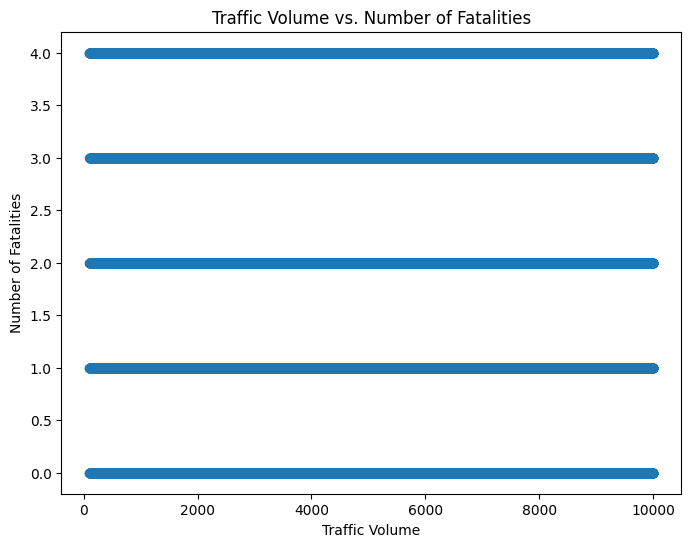

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Traffic Volume'], data['Number of Fatalities'], alpha=0.5)
plt.title('Traffic Volume vs. Number of Fatalities')
plt.xlabel('Traffic Volume')
plt.ylabel('Number of Fatalities')
plt.show()

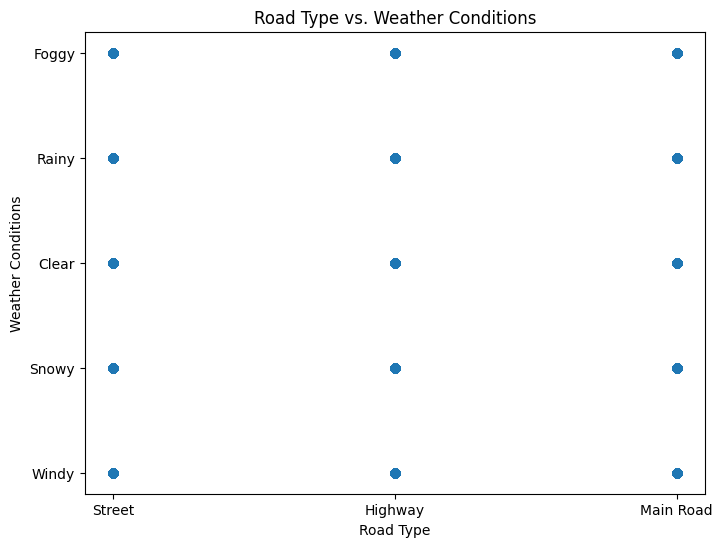

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Road Type'], data['Weather Conditions'], alpha=0.5)
plt.title('Road Type vs. Weather Conditions')
plt.xlabel('Road Type')
plt.ylabel('Weather Conditions')
plt.show()

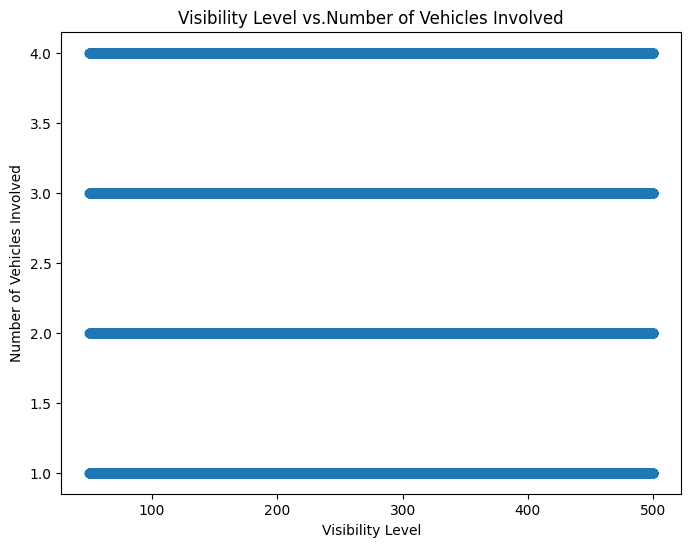

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Visibility Level'], data['Number of Vehicles Involved'], alpha=0.5)
plt.title('Visibility Level vs.Number of Vehicles Involved')
plt.xlabel('Visibility Level')
plt.ylabel('Number of Vehicles Involved')
plt.show()

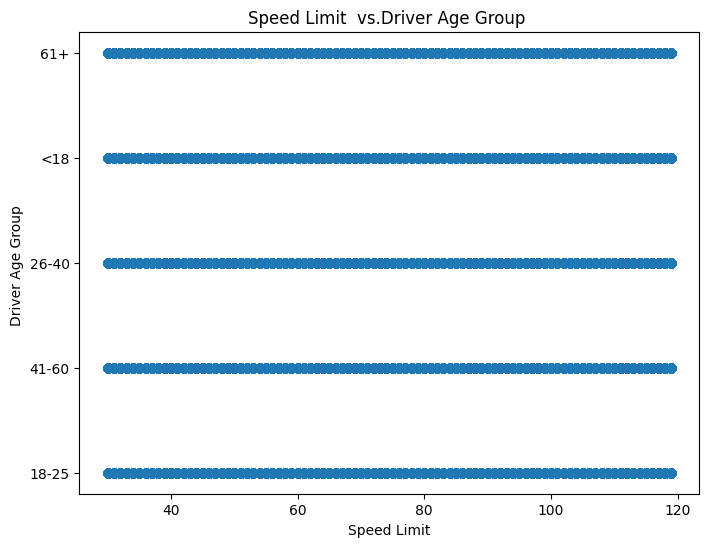

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Speed Limit'], data['Driver Age Group'], alpha=0.5)
plt.title('Speed Limit  vs.Driver Age Group ')
plt.xlabel('Speed Limit')
plt.ylabel('Driver Age Group ')
plt.show()

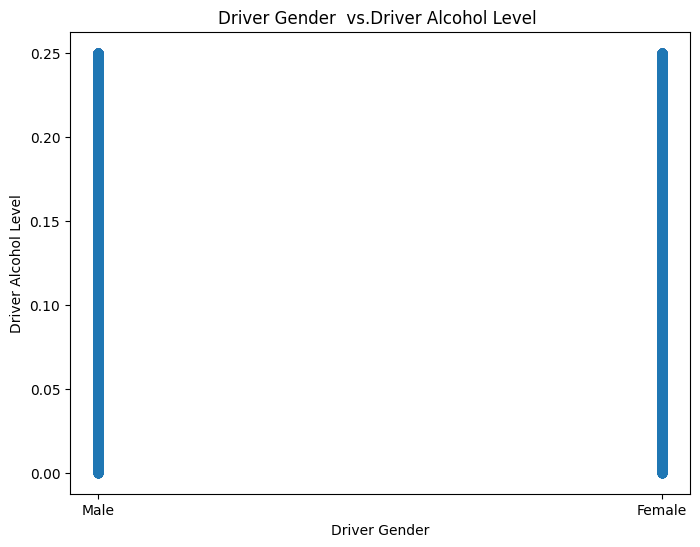

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Driver Gender'], data['Driver Alcohol Level'], alpha=0.5)
plt.title('Driver Gender  vs.Driver Alcohol Level ')
plt.xlabel('Driver Gender')
plt.ylabel('Driver Alcohol Level')
plt.show()

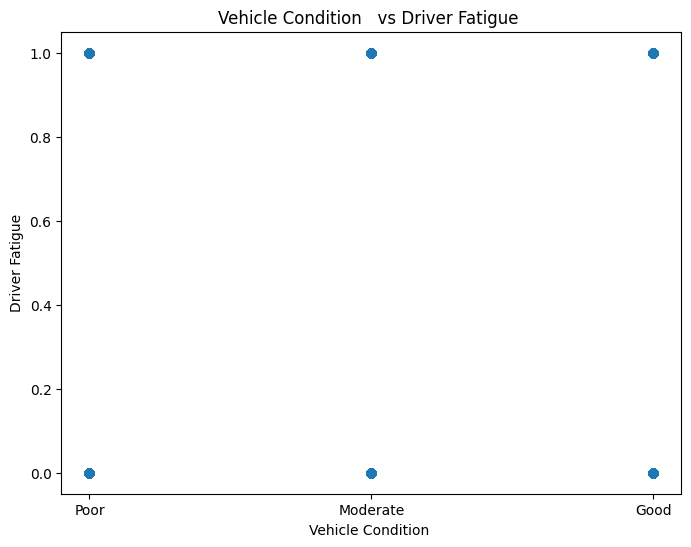

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Vehicle Condition'], data['Driver Fatigue'], alpha=0.5)
plt.title('Vehicle Condition   vs Driver Fatigue ')
plt.xlabel('Vehicle Condition ')
plt.ylabel('Driver Fatigue')
plt.show()

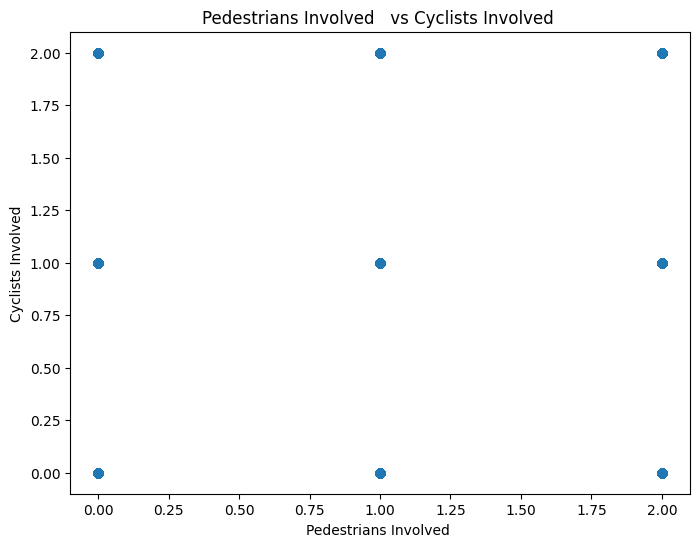

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Pedestrians Involved'], data['Cyclists Involved'], alpha=0.5)
plt.title('Pedestrians Involved   vs Cyclists Involved ')
plt.xlabel('Pedestrians Involved ')
plt.ylabel('Cyclists Involved')
plt.show()

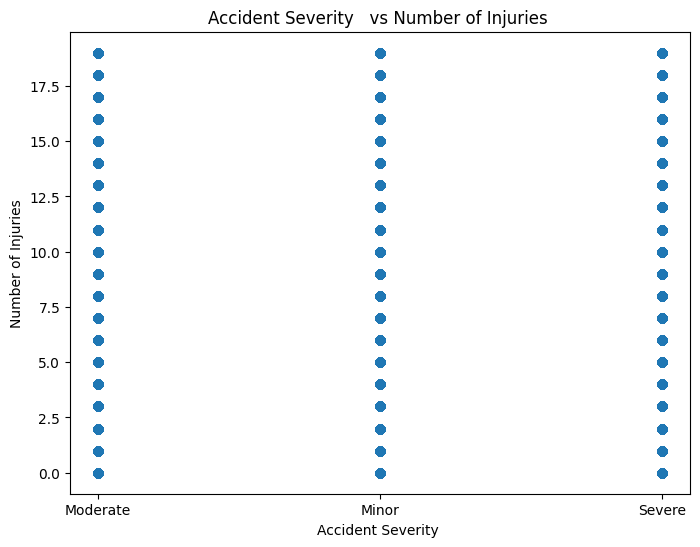

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Accident Severity'], data['Number of Injuries'], alpha=0.5)
plt.title('Accident Severity   vs Number of Injuries ')
plt.xlabel('Accident Severity ')
plt.ylabel('Number of Injuries')
plt.show()

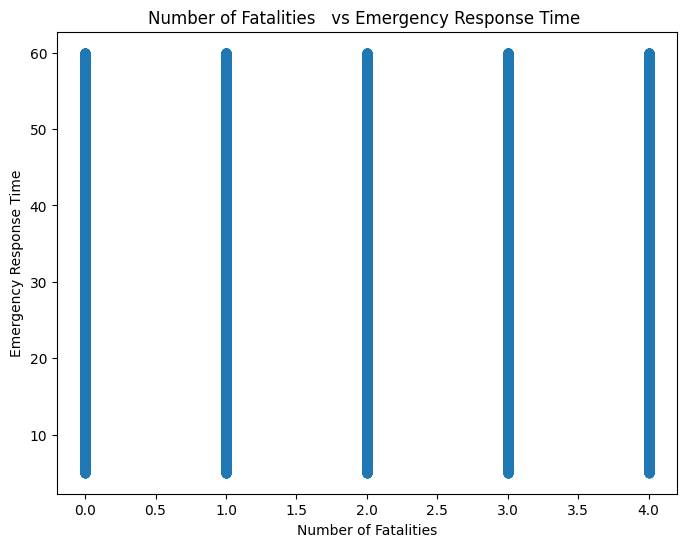

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Number of Fatalities'], data['Emergency Response Time'], alpha=0.5)
plt.title('Number of Fatalities   vs Emergency Response Time ')
plt.xlabel('Number of Fatalities')
plt.ylabel('Emergency Response Time')
plt.show()

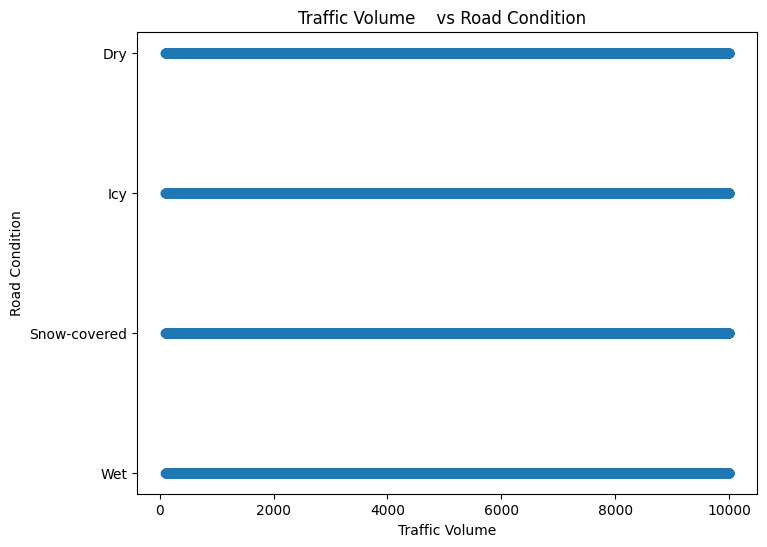

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Traffic Volume'], data['Road Condition'], alpha=0.5)
plt.title('Traffic Volume    vs Road Condition  ')
plt.xlabel('Traffic Volume')
plt.ylabel('Road Condition')
plt.show()

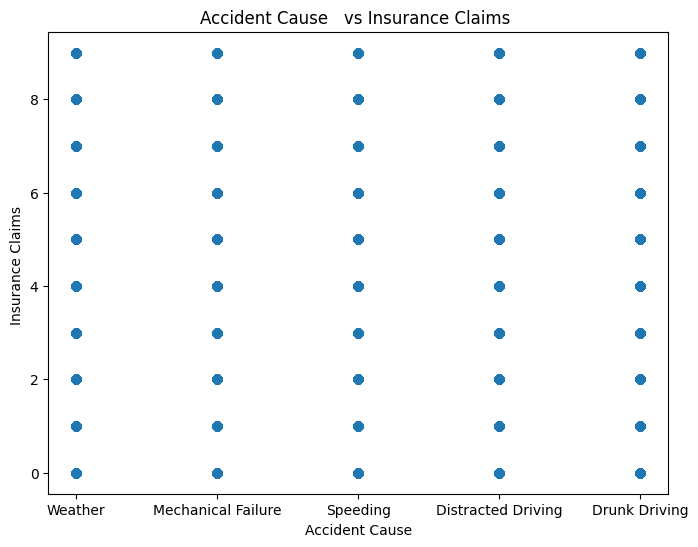

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Accident Cause'], data['Insurance Claims'], alpha=0.5)
plt.title('Accident Cause   vs Insurance Claims ')
plt.xlabel('Accident Cause')
plt.ylabel('Insurance Claims ')
plt.show()

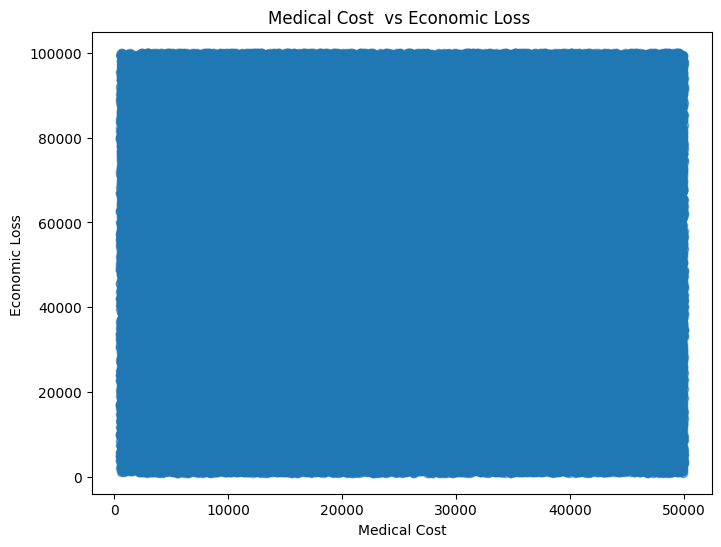

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Medical Cost'], data['Economic Loss'], alpha=0.5)
plt.title('Medical Cost  vs Economic Loss ')
plt.xlabel('Medical Cost')
plt.ylabel('Economic Loss ')
plt.show()

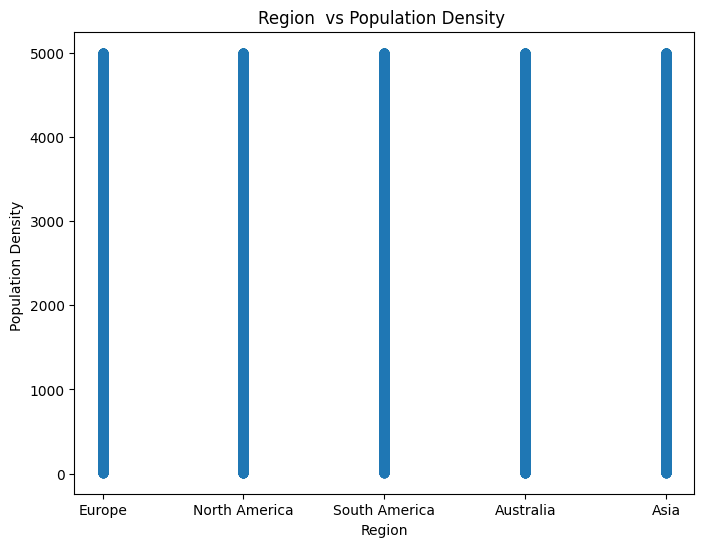

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Region'], data['Population Density'], alpha=0.5)
plt.title('Region  vs Population Density ')
plt.xlabel('Region')
plt.ylabel('Population Density ')
plt.show()

# **Time Series Plot**

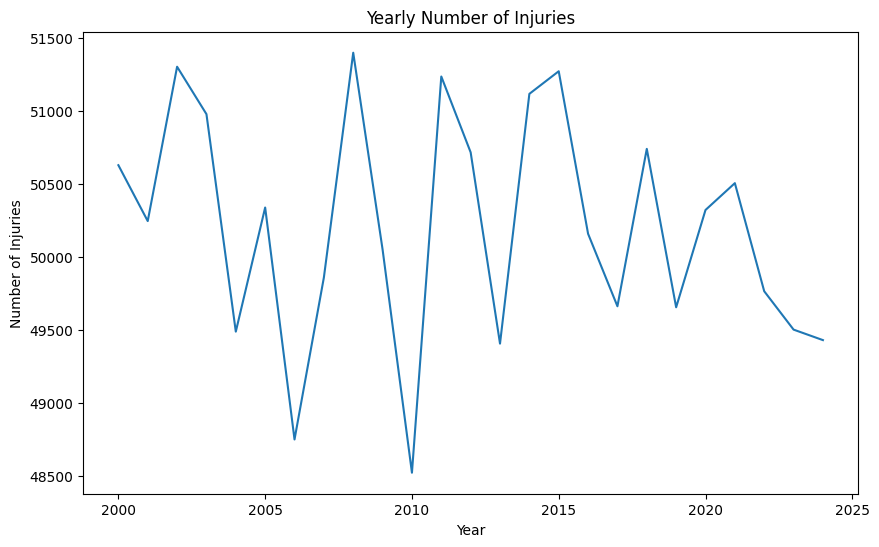

In [23]:
time_series = data.groupby('Year')['Number of Injuries'].sum()
time_series.plot(figsize=(10, 6), title='Yearly Number of Injuries')
plt.ylabel('Number of Injuries')
plt.xlabel('Year')
plt.show()

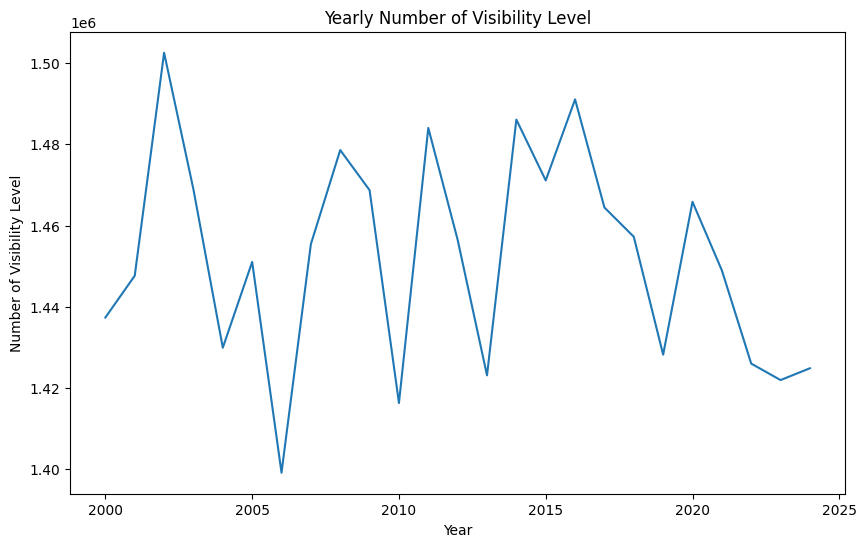

In [24]:
time_series = data.groupby('Year')['Visibility Level'].sum()
time_series.plot(figsize=(10, 6), title='Yearly Number of Visibility Level')
plt.ylabel('Number of Visibility Level')
plt.xlabel('Year')
plt.show()

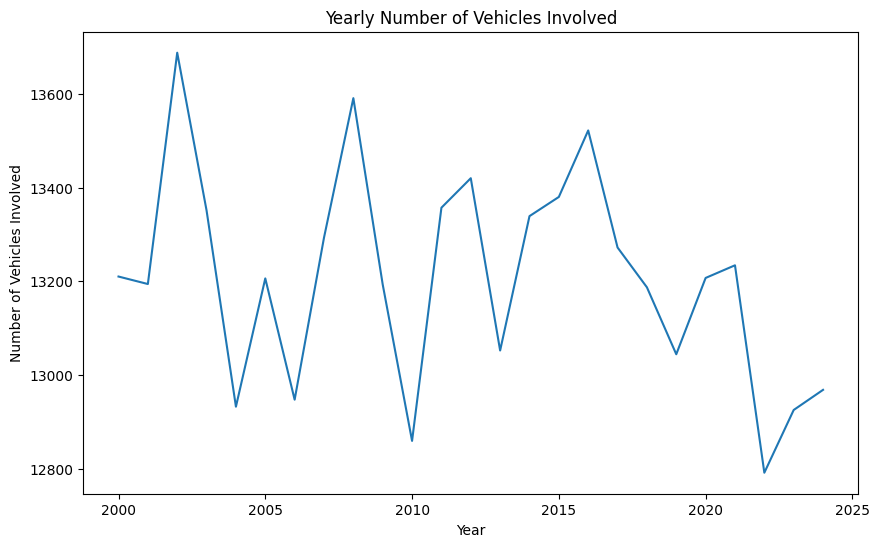

In [25]:
time_series = data.groupby('Year')['Number of Vehicles Involved'].sum()
time_series.plot(figsize=(10, 6), title='Yearly Number of Vehicles Involved')
plt.ylabel('Number of Vehicles Involved')
plt.xlabel('Year')
plt.show()

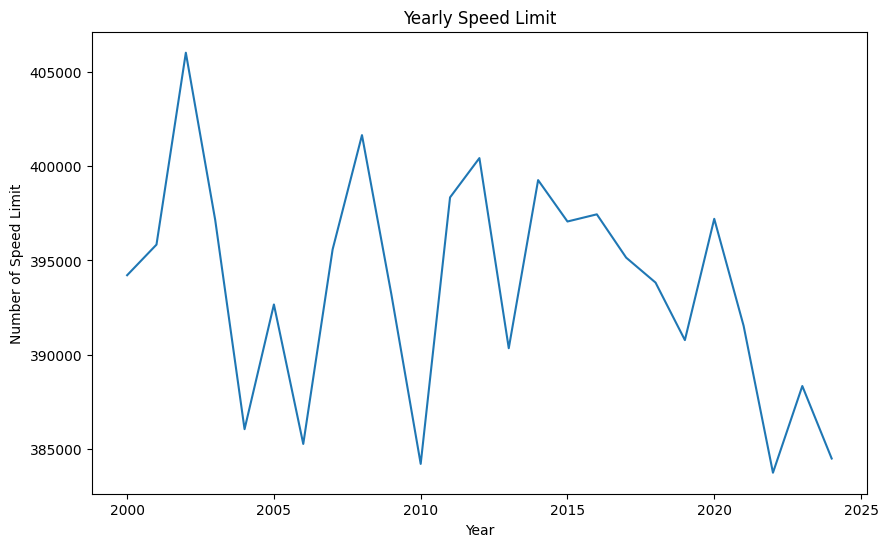

In [26]:
time_series = data.groupby('Year')['Speed Limit'].sum()
time_series.plot(figsize=(10, 6), title='Yearly Speed Limit')
plt.ylabel('Number of Speed Limit')
plt.xlabel('Year')
plt.show()

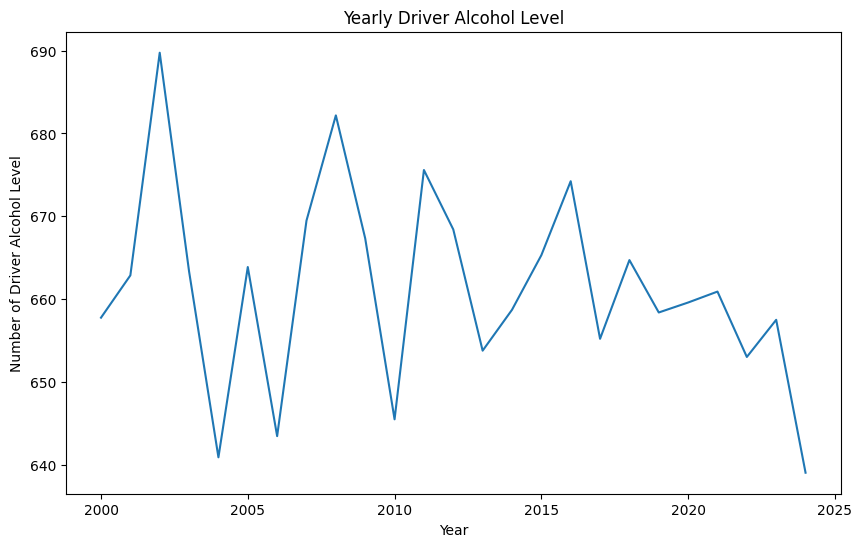

In [27]:
time_series = data.groupby('Year')['Driver Alcohol Level'].sum()
time_series.plot(figsize=(10, 6), title='Yearly Driver Alcohol Level')
plt.ylabel('Number of Driver Alcohol Level')
plt.xlabel('Year')
plt.show()

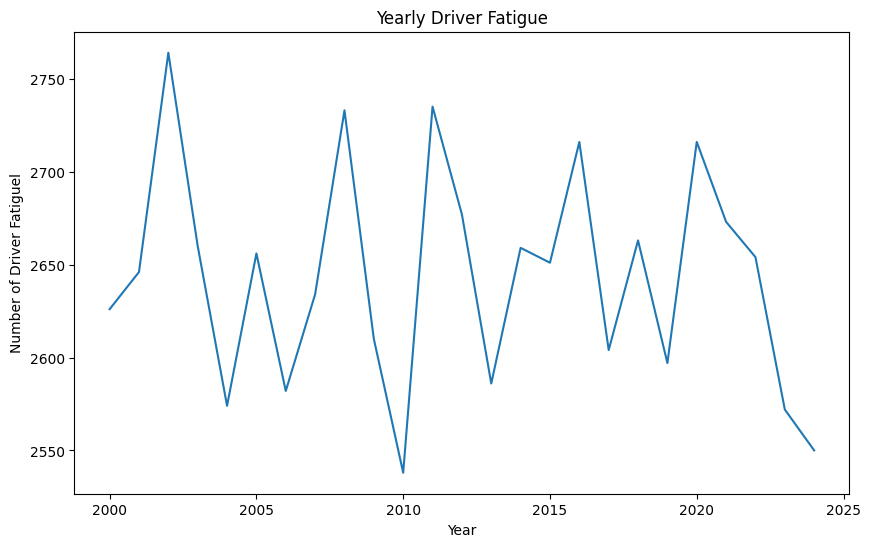

In [28]:
time_series = data.groupby('Year')['Driver Fatigue'].sum()
time_series.plot(figsize=(10, 6), title='Yearly Driver Fatigue')
plt.ylabel('Number of Driver Fatiguel')
plt.xlabel('Year')
plt.show()

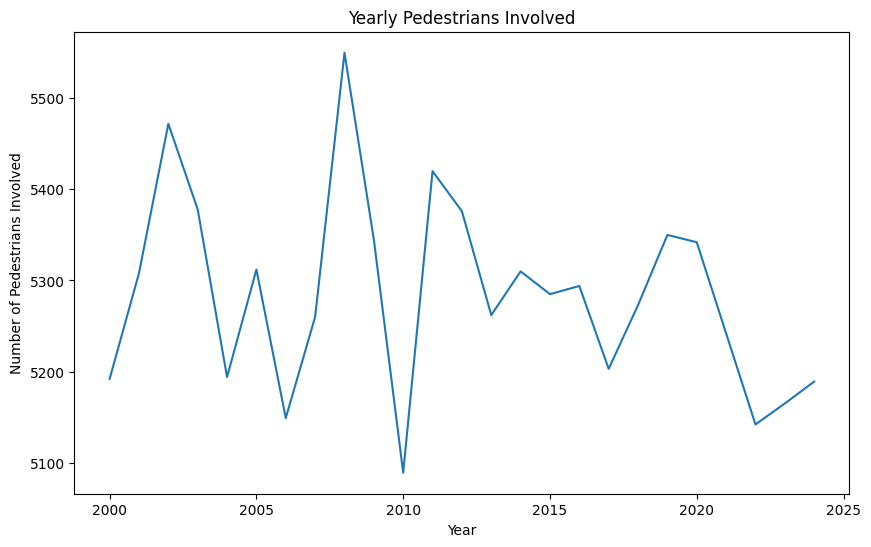

In [29]:
time_series = data.groupby('Year')['Pedestrians Involved'].sum()
time_series.plot(figsize=(10, 6), title='Yearly Pedestrians Involved')
plt.ylabel('Number of Pedestrians Involved')
plt.xlabel('Year')
plt.show()

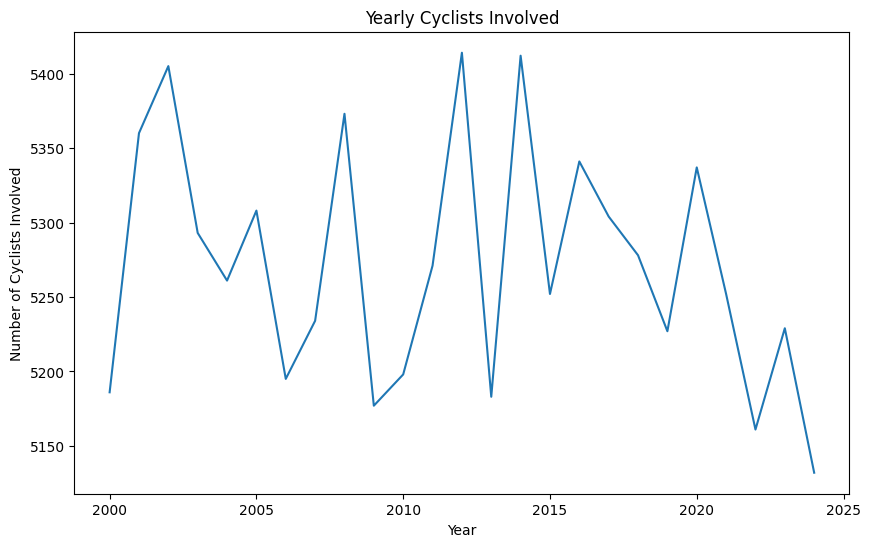

In [30]:
time_series = data.groupby('Year')['Cyclists Involved'].sum()
time_series.plot(figsize=(10, 6), title='Yearly Cyclists Involved')
plt.ylabel('Number of Cyclists Involved')
plt.xlabel('Year')
plt.show()

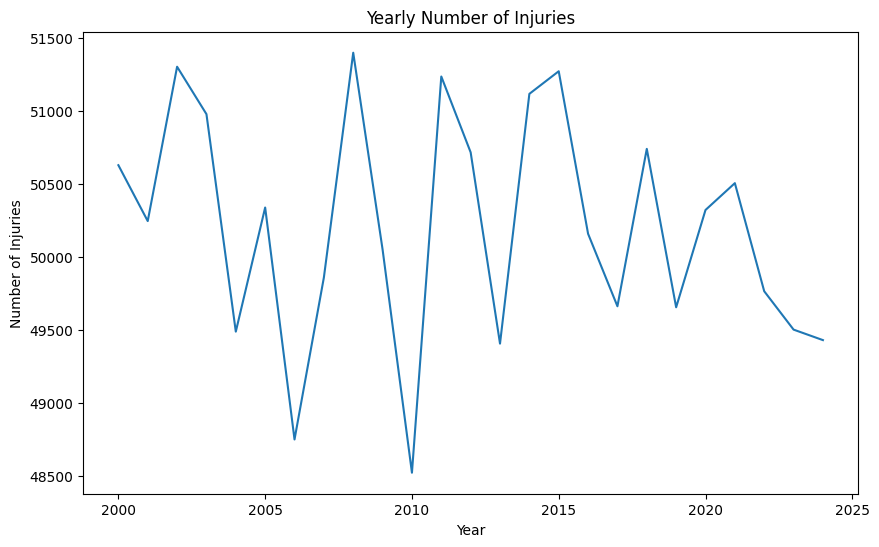

In [31]:
time_series = data.groupby('Year')['Number of Injuries'].sum()
time_series.plot(figsize=(10, 6), title='Yearly Number of Injuries')
plt.ylabel('Number of Injuries')
plt.xlabel('Year')
plt.show()

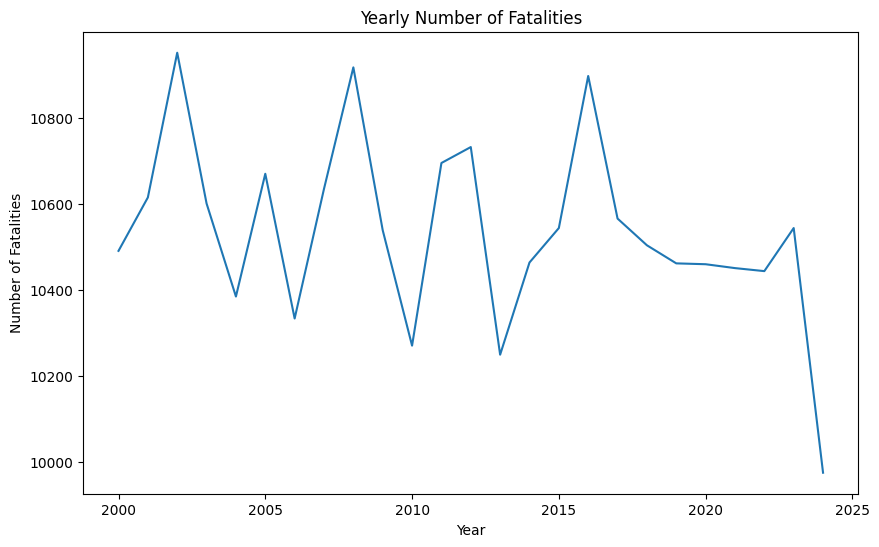

In [32]:
time_series = data.groupby('Year')['Number of Fatalities'].sum()
time_series.plot(figsize=(10, 6), title='Yearly Number of Fatalities')
plt.ylabel('Number of Fatalities')
plt.xlabel('Year')
plt.show()

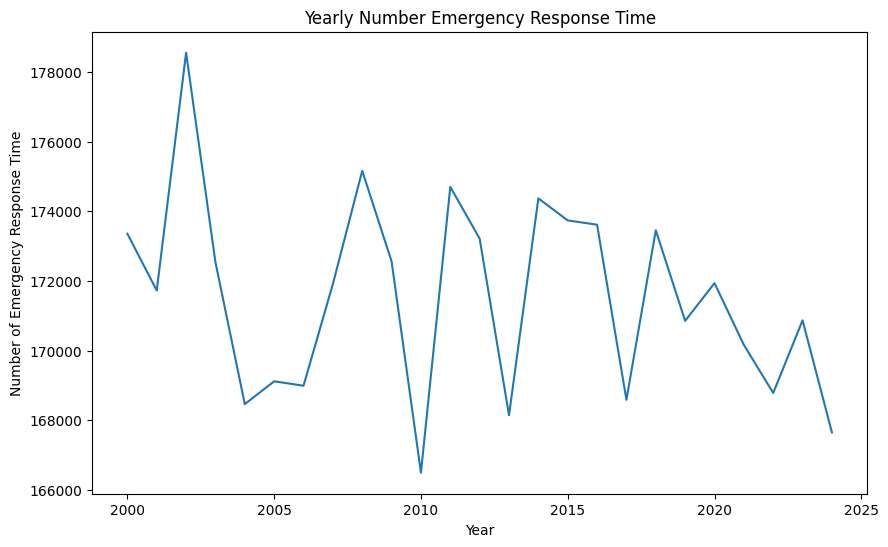

In [33]:
time_series = data.groupby('Year')['Emergency Response Time'].sum()
time_series.plot(figsize=(10, 6), title='Yearly Number Emergency Response Time')
plt.ylabel('Number of Emergency Response Time')
plt.xlabel('Year')
plt.show()

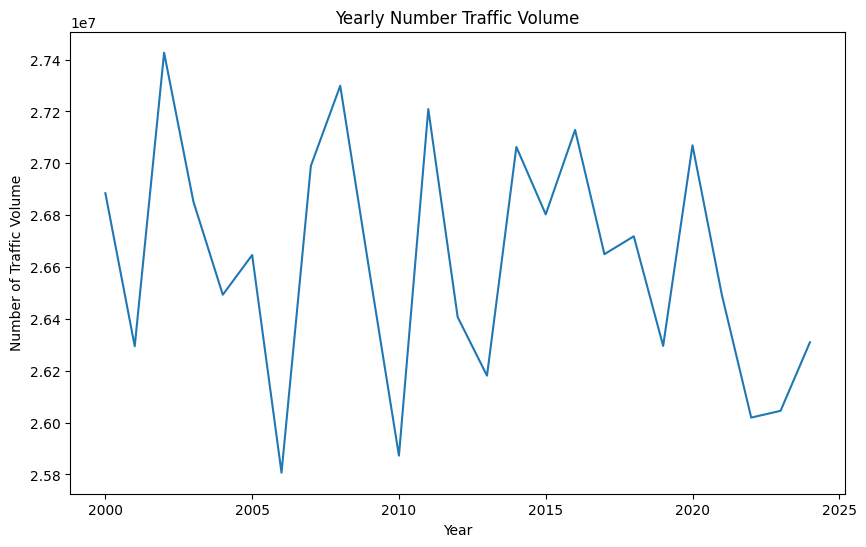

In [34]:
time_series = data.groupby('Year')['Traffic Volume'].sum()
time_series.plot(figsize=(10, 6), title='Yearly Number Traffic Volume')
plt.ylabel('Number of Traffic Volume')
plt.xlabel('Year')
plt.show()

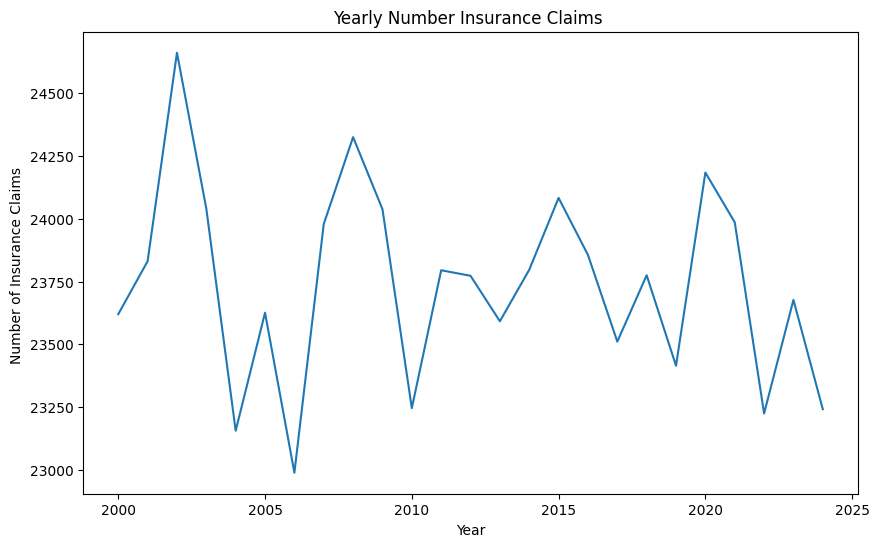

In [35]:
time_series = data.groupby('Year')['Insurance Claims'].sum()
time_series.plot(figsize=(10, 6), title='Yearly Number Insurance Claims ')
plt.ylabel('Number of Insurance Claims ')
plt.xlabel('Year')
plt.show()

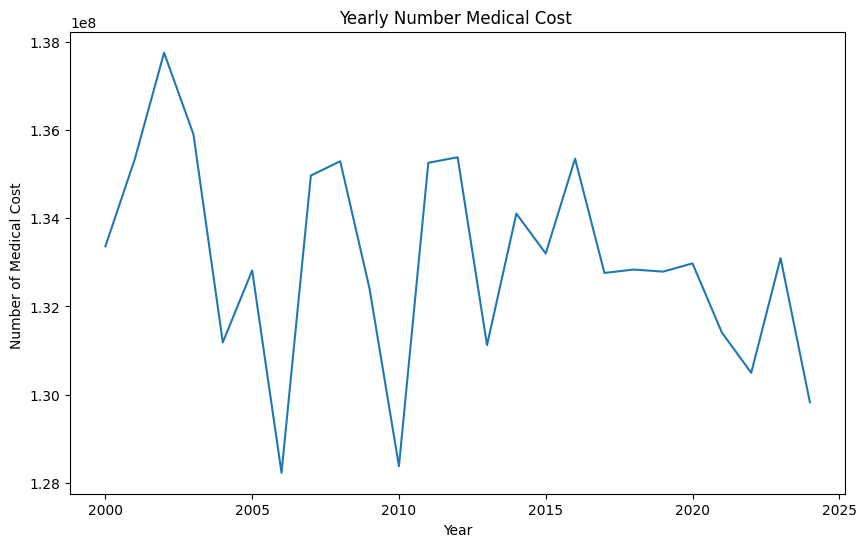

In [36]:
time_series = data.groupby('Year')['Medical Cost'].sum()
time_series.plot(figsize=(10, 6), title='Yearly Number Medical Cost ')
plt.ylabel('Number of Medical Cost ')
plt.xlabel('Year')
plt.show()

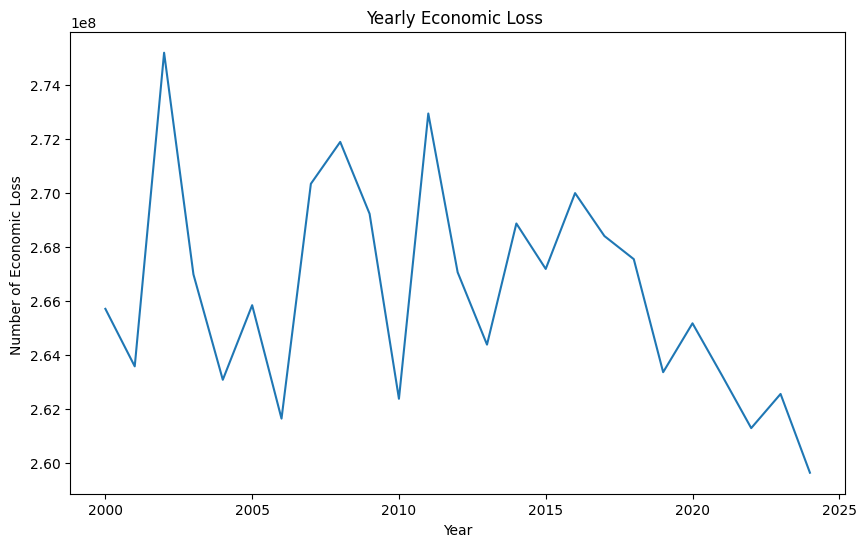

In [37]:
time_series = data.groupby('Year')['Economic Loss'].sum()
time_series.plot(figsize=(10, 6), title='Yearly Economic Loss ')
plt.ylabel('Number of Economic Loss ')
plt.xlabel('Year')
plt.show()

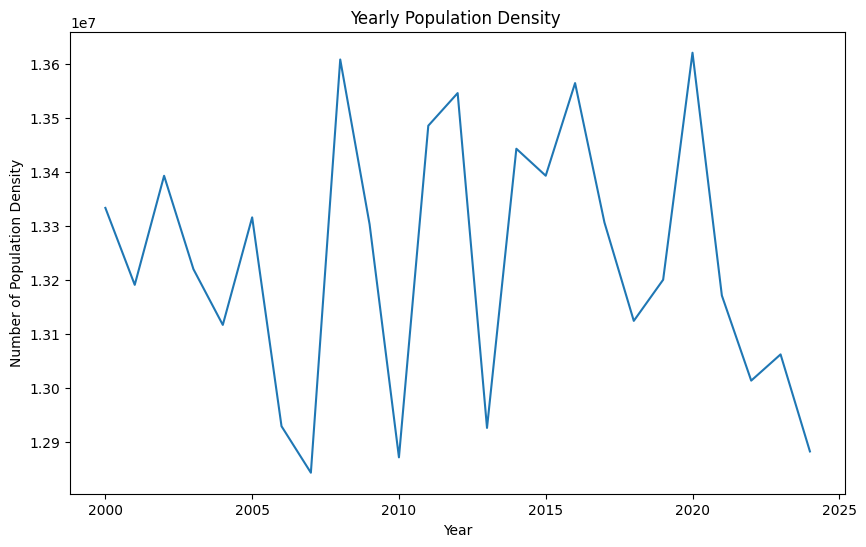

In [38]:
time_series = data.groupby('Year')['Population Density'].sum()
time_series.plot(figsize=(10, 6), title='Yearly Population Density ')
plt.ylabel('Number of Population Density')
plt.xlabel('Year')
plt.show()

# **Histogram**

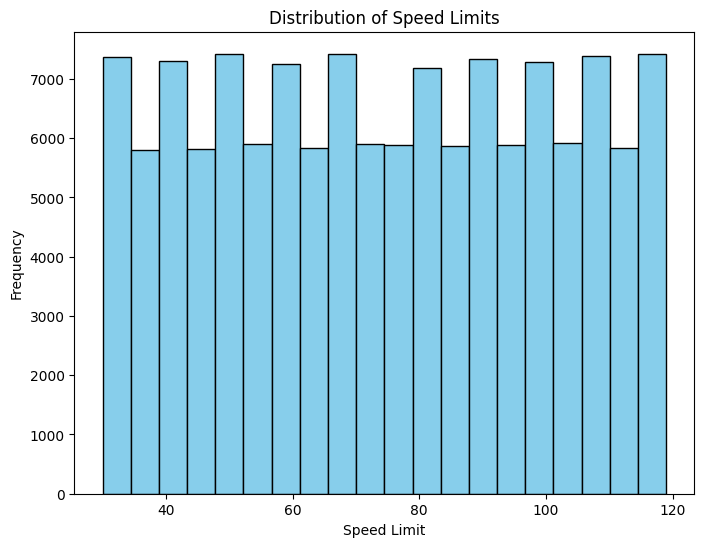

In [39]:
plt.figure(figsize=(8, 6))
plt.hist(data['Speed Limit'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Speed Limits')
plt.xlabel('Speed Limit')
plt.ylabel('Frequency')
plt.show()

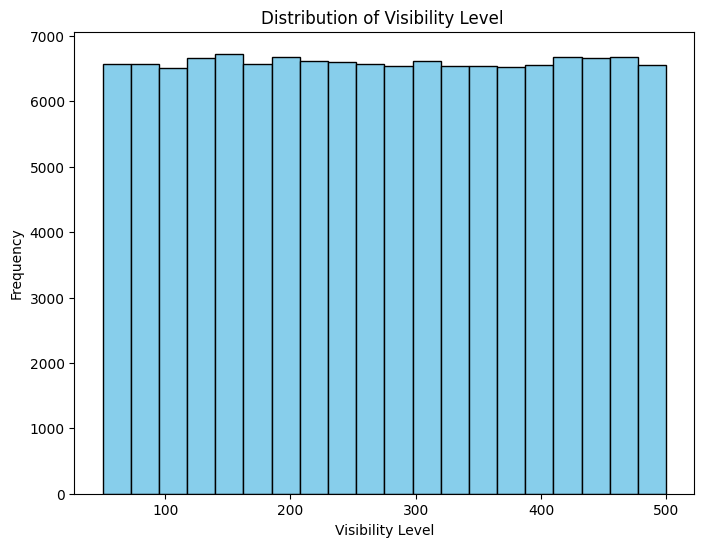

In [40]:
plt.figure(figsize=(8, 6))
plt.hist(data['Visibility Level'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Visibility Level ')
plt.xlabel('Visibility Level')
plt.ylabel('Frequency')
plt.show()

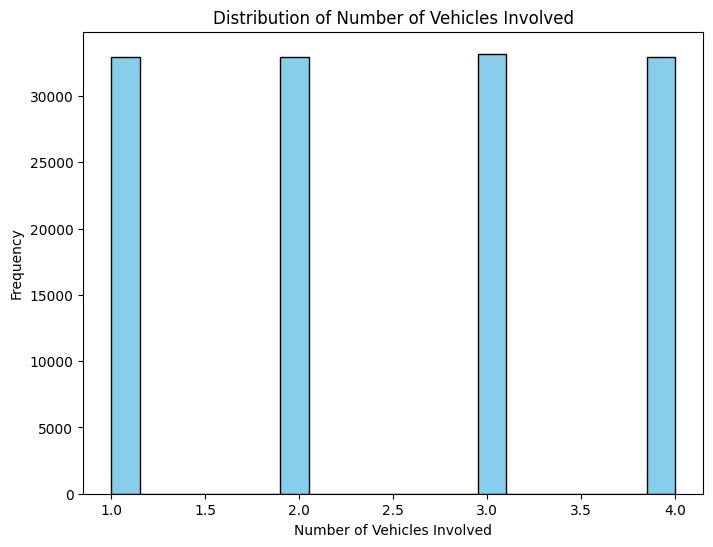

In [41]:
plt.figure(figsize=(8, 6))
plt.hist(data['Number of Vehicles Involved'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Vehicles Involved')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Frequency')
plt.show()

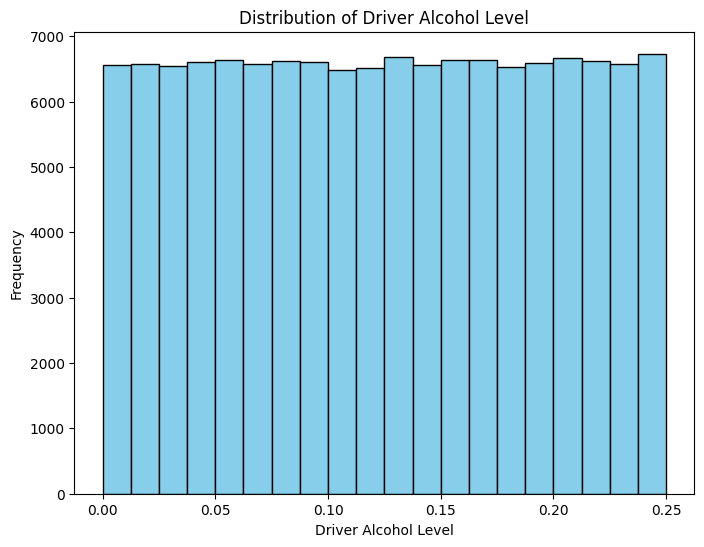

In [42]:
plt.figure(figsize=(8, 6))
plt.hist(data['Driver Alcohol Level'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Driver Alcohol Level')
plt.xlabel('Driver Alcohol Level')
plt.ylabel('Frequency')
plt.show()

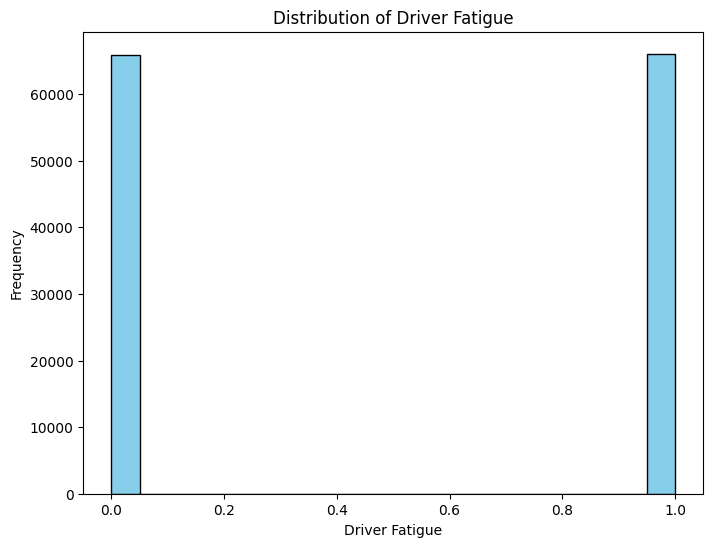

In [43]:
plt.figure(figsize=(8, 6))
plt.hist(data['Driver Fatigue'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Driver Fatigue')
plt.xlabel('Driver Fatigue')
plt.ylabel('Frequency')
plt.show()

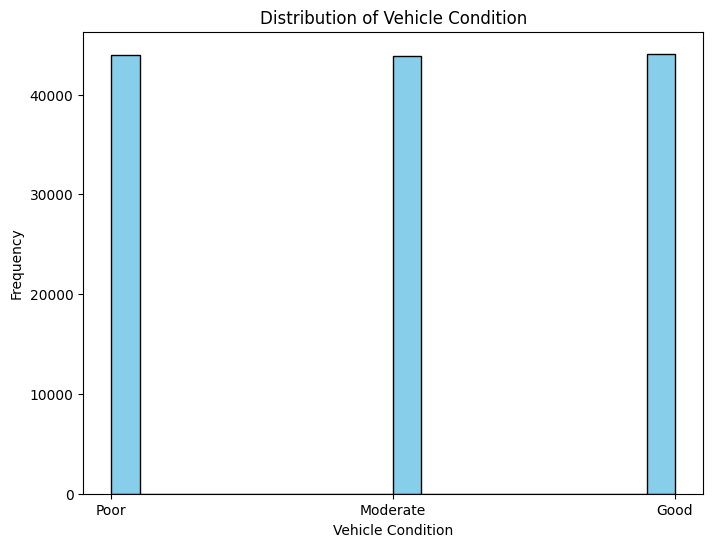

In [44]:
plt.figure(figsize=(8, 6))
plt.hist(data['Vehicle Condition'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Vehicle Condition')
plt.xlabel('Vehicle Condition')
plt.ylabel('Frequency')
plt.show()

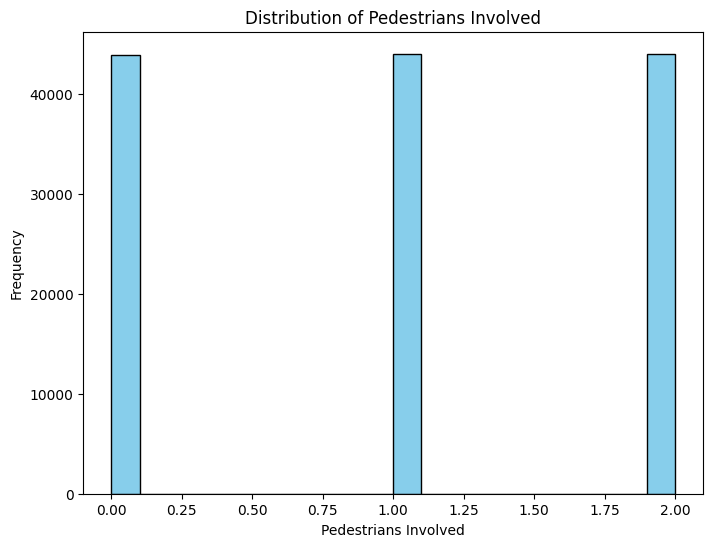

In [45]:
plt.figure(figsize=(8, 6))
plt.hist(data['Pedestrians Involved'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Pedestrians Involved')
plt.xlabel('Pedestrians Involved')
plt.ylabel('Frequency')
plt.show()

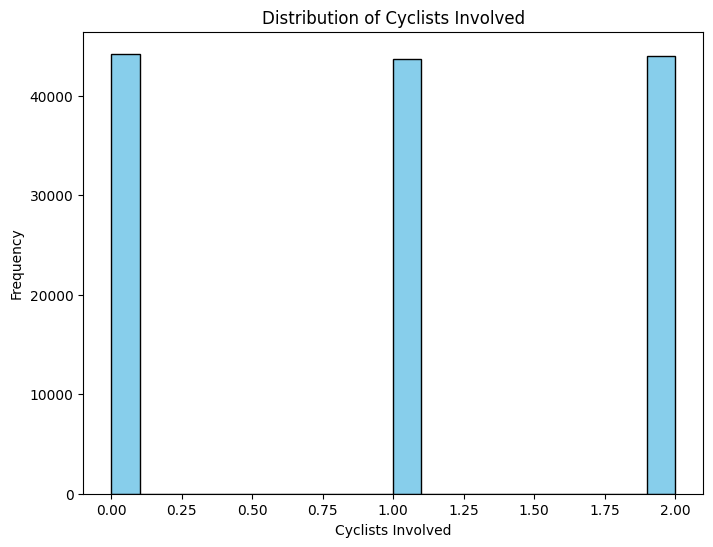

In [46]:
plt.figure(figsize=(8, 6))
plt.hist(data['Cyclists Involved'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Cyclists Involved')
plt.xlabel('Cyclists Involved')
plt.ylabel('Frequency')
plt.show()

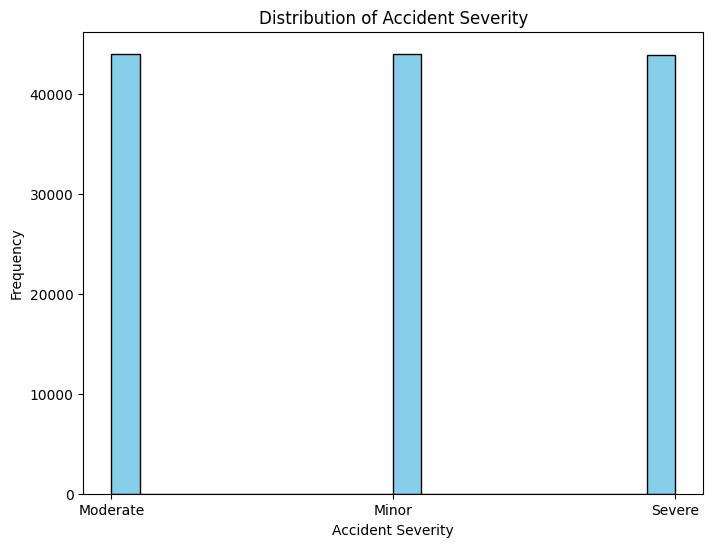

In [47]:
plt.figure(figsize=(8, 6))
plt.hist(data['Accident Severity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Frequency')
plt.show()

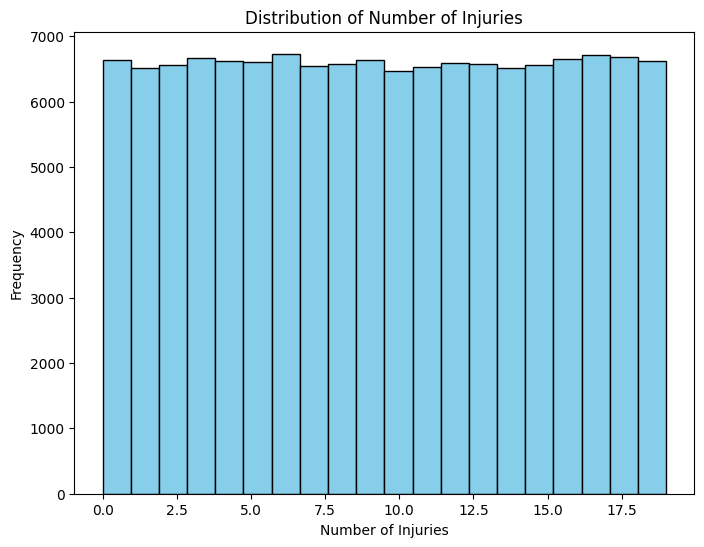

In [48]:
plt.figure(figsize=(8, 6))
plt.hist(data['Number of Injuries'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Injuries')
plt.xlabel('Number of Injuries')
plt.ylabel('Frequency')
plt.show()

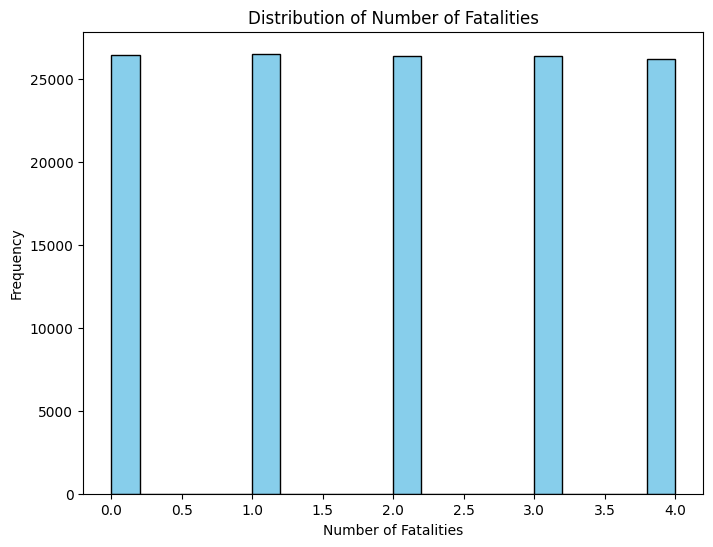

In [49]:
plt.figure(figsize=(8, 6))
plt.hist(data['Number of Fatalities'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Fatalities')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.show()

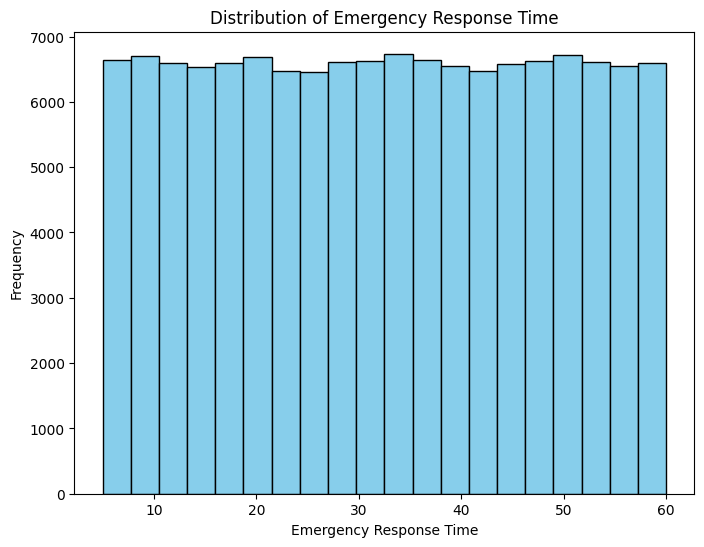

In [50]:
plt.figure(figsize=(8, 6))
plt.hist(data['Emergency Response Time'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Emergency Response Time')
plt.xlabel('Emergency Response Time')
plt.ylabel('Frequency')
plt.show()

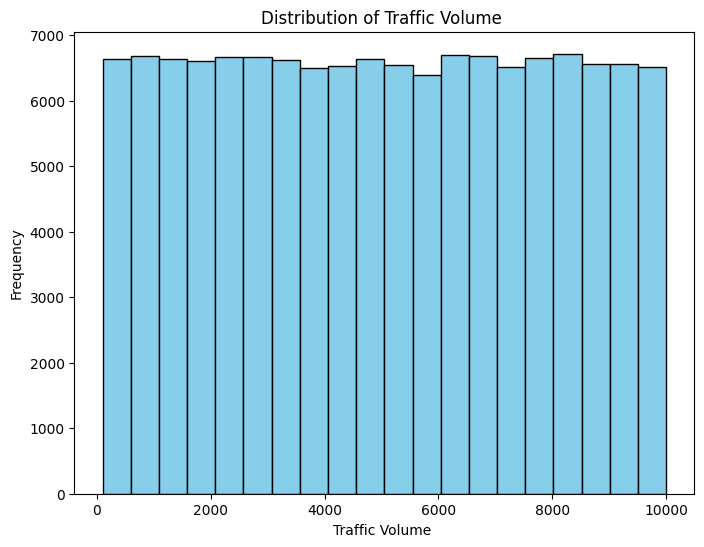

In [51]:
plt.figure(figsize=(8, 6))
plt.hist(data['Traffic Volume'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Traffic Volume ')
plt.xlabel('Traffic Volume ')
plt.ylabel('Frequency')
plt.show()

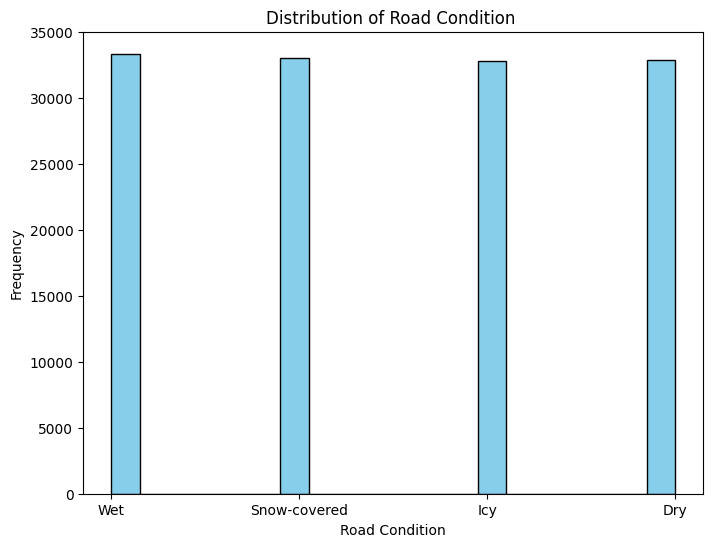

In [52]:
plt.figure(figsize=(8, 6))
plt.hist(data['Road Condition'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Road Condition ')
plt.xlabel('Road Condition')
plt.ylabel('Frequency')
plt.show()

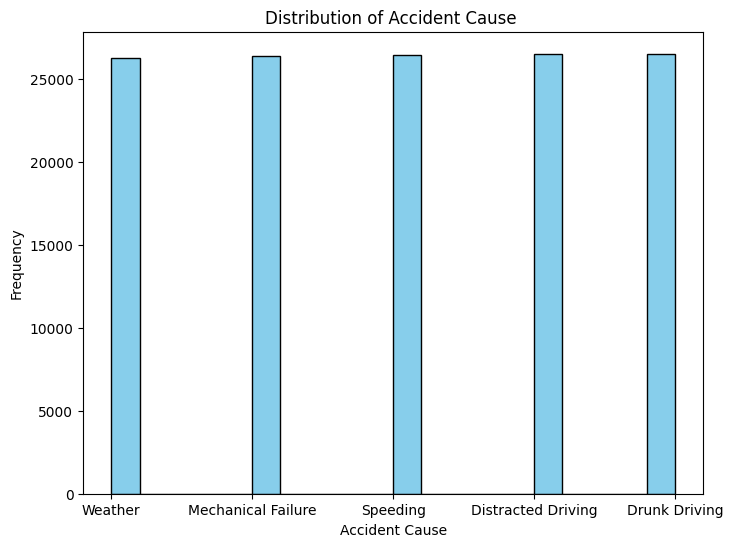

In [53]:
plt.figure(figsize=(8, 6))
plt.hist(data['Accident Cause'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Accident Cause ')
plt.xlabel('Accident Cause')
plt.ylabel('Frequency')
plt.show()

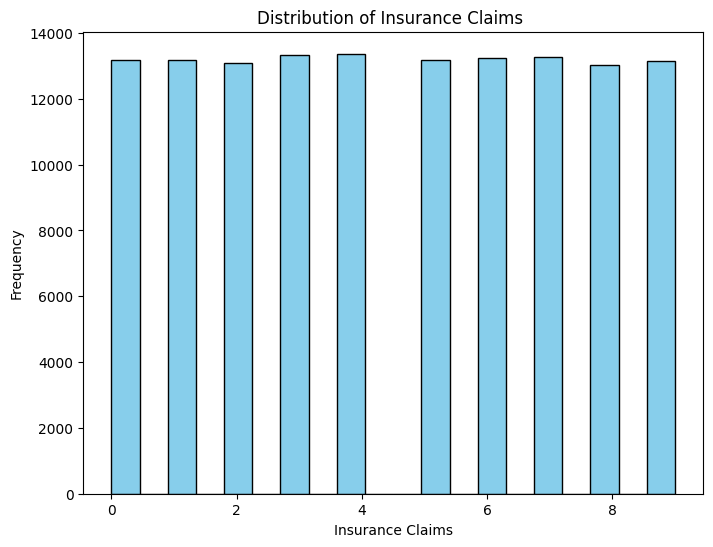

In [54]:
plt.figure(figsize=(8, 6))
plt.hist(data['Insurance Claims'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Insurance Claims ')
plt.xlabel('Insurance Claims')
plt.ylabel('Frequency')
plt.show()

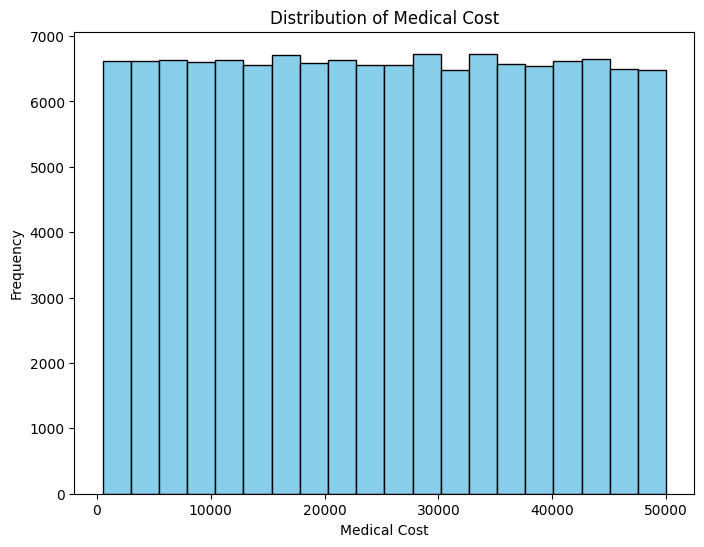

In [55]:
plt.figure(figsize=(8, 6))
plt.hist(data['Medical Cost'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Medical Cost')
plt.xlabel('Medical Cost')
plt.ylabel('Frequency')
plt.show()

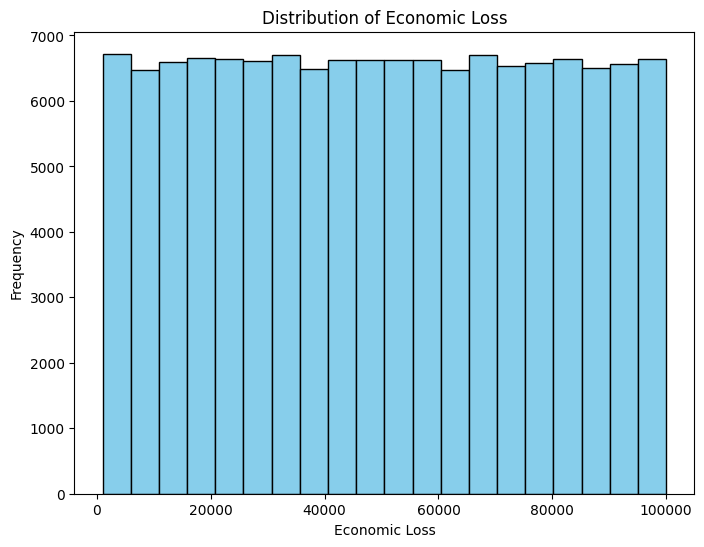

In [56]:
plt.figure(figsize=(8, 6))
plt.hist(data['Economic Loss'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Economic Loss')
plt.xlabel('Economic Loss')
plt.ylabel('Frequency')
plt.show()

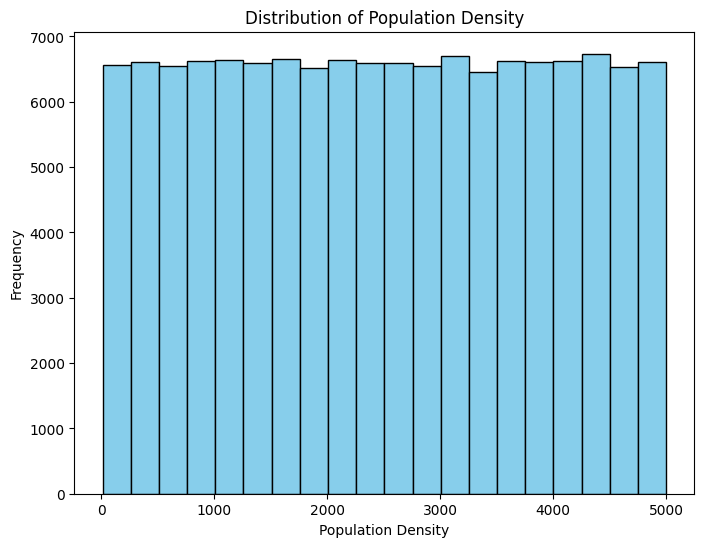

In [57]:
plt.figure(figsize=(8, 6))
plt.hist(data['Population Density'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Population Density')
plt.xlabel('Population Density')
plt.ylabel('Frequency')
plt.show()

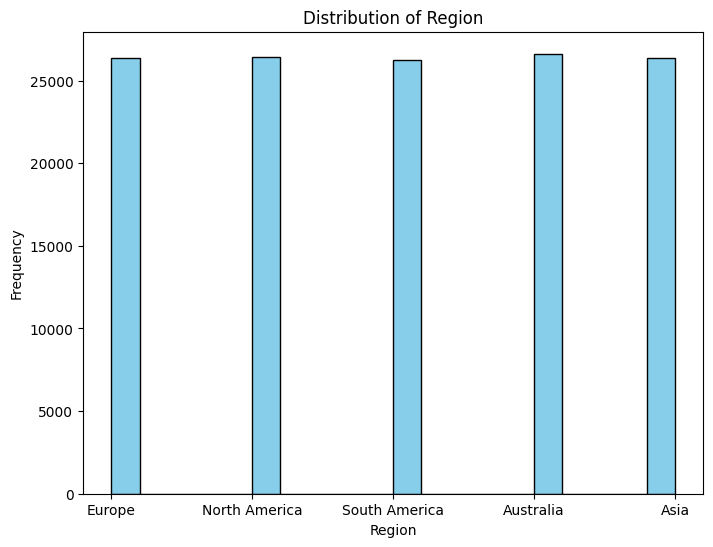

In [58]:
plt.figure(figsize=(8, 6))
plt.hist(data['Region'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.show()

# **Box Plot**

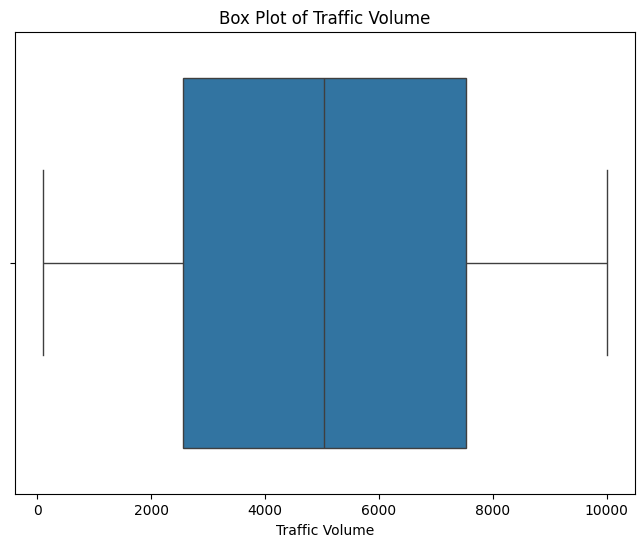

In [59]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Traffic Volume'])
plt.title('Box Plot of Traffic Volume')
plt.show()

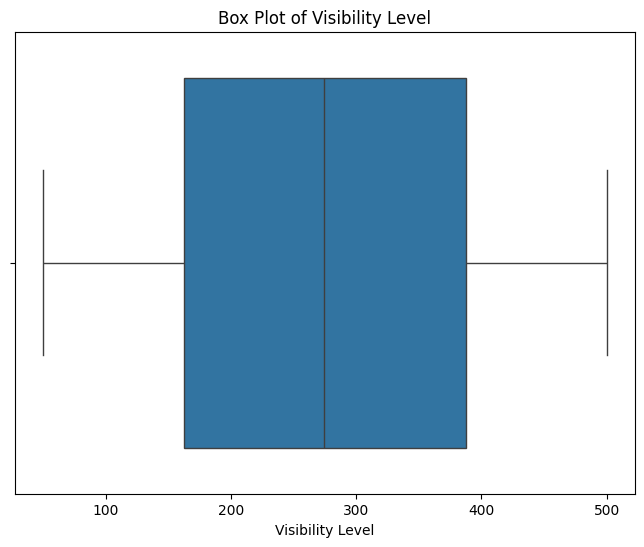

In [60]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Visibility Level'])
plt.title('Box Plot of Visibility Level')
plt.show()

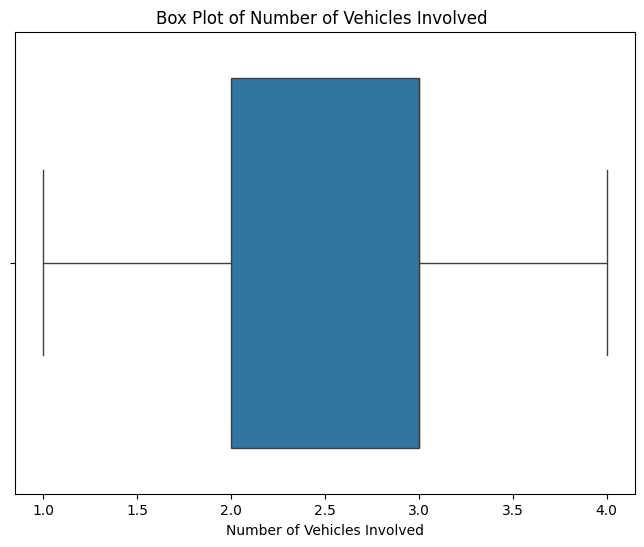

In [61]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Number of Vehicles Involved'])
plt.title('Box Plot of Number of Vehicles Involved ')
plt.show()

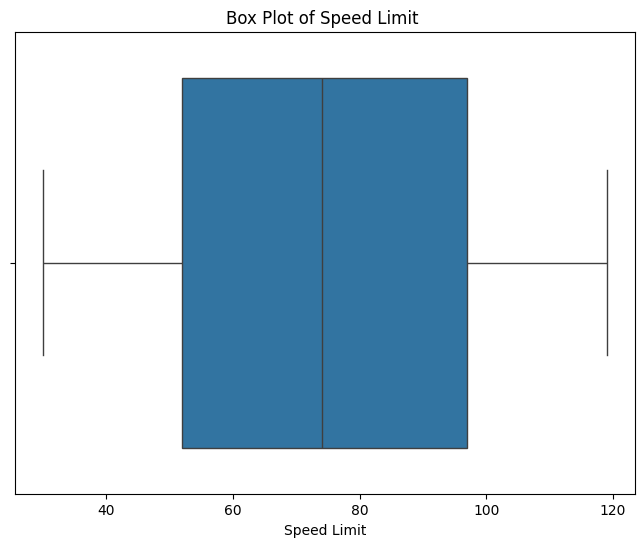

In [62]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Speed Limit'])
plt.title('Box Plot of Speed Limit ')
plt.show()

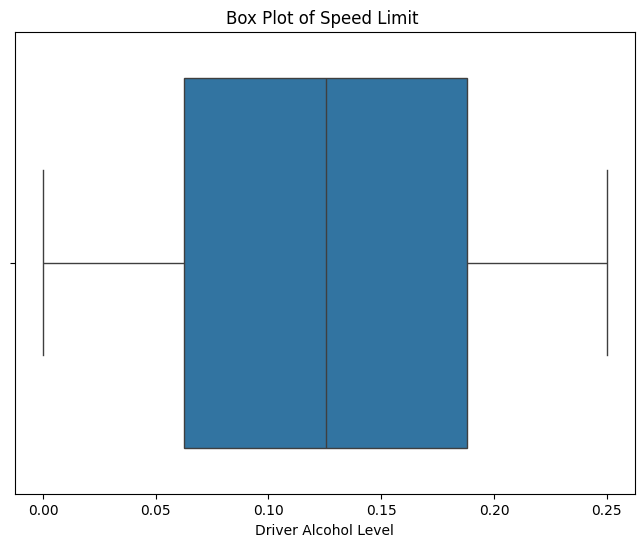

In [63]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Driver Alcohol Level'])
plt.title('Box Plot of Speed Limit ')
plt.show()

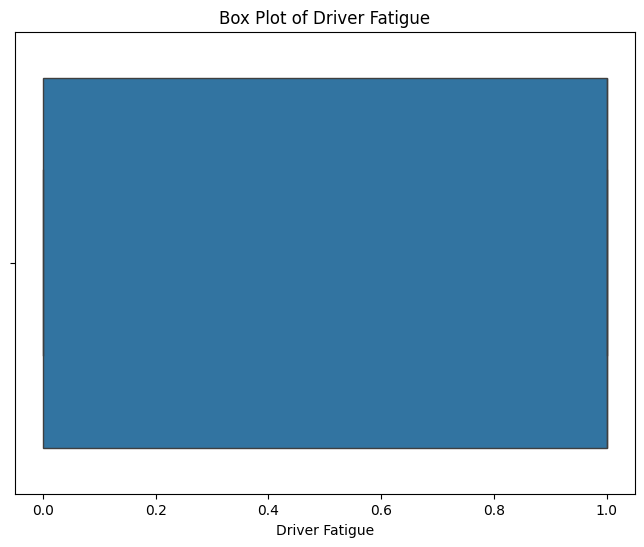

In [64]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Driver Fatigue'])
plt.title('Box Plot of Driver Fatigue')
plt.show()

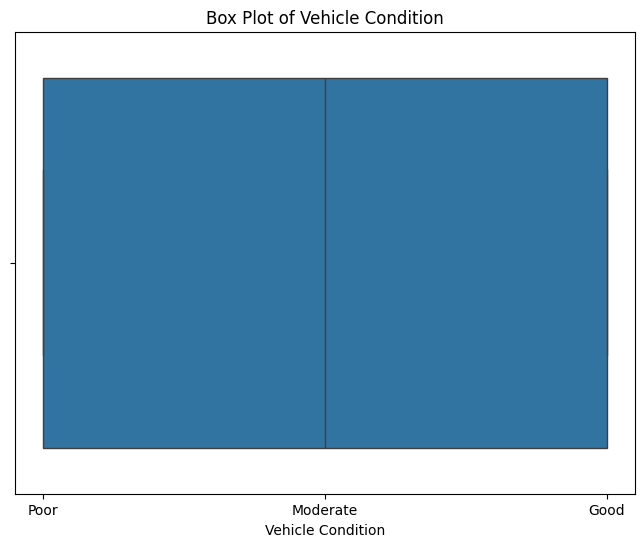

In [65]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Vehicle Condition'])
plt.title('Box Plot of Vehicle Condition')
plt.show()

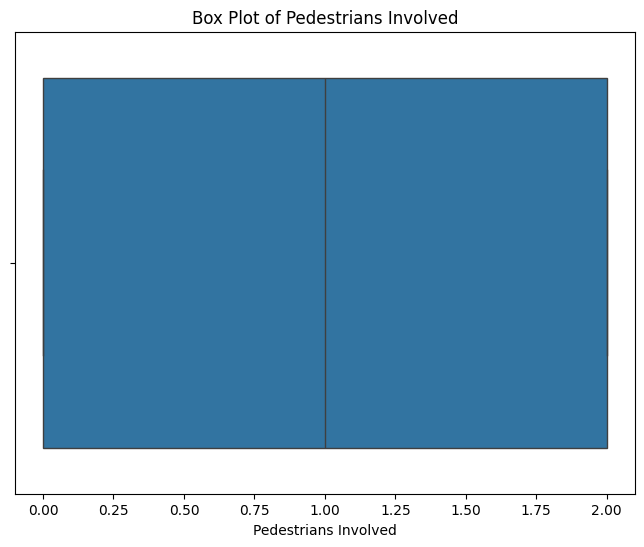

In [66]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Pedestrians Involved'])
plt.title('Box Plot of Pedestrians Involved')
plt.show()

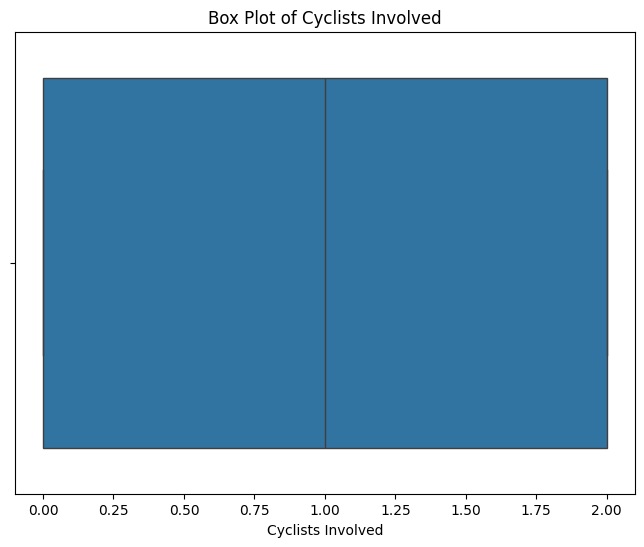

In [67]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Cyclists Involved'])
plt.title('Box Plot of Cyclists Involved')
plt.show()

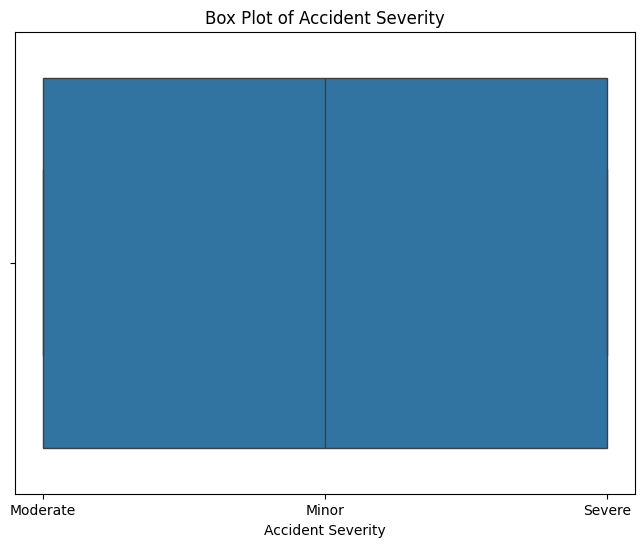

In [68]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Accident Severity'])
plt.title('Box Plot of Accident Severity')
plt.show()

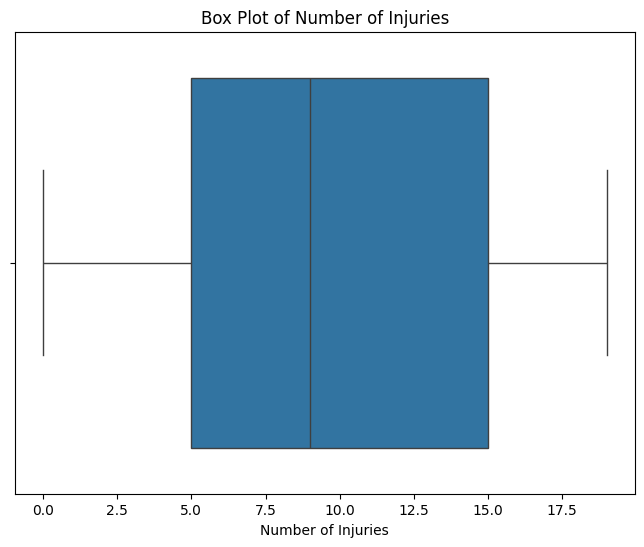

In [69]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Number of Injuries'])
plt.title('Box Plot of Number of Injuries')
plt.show()

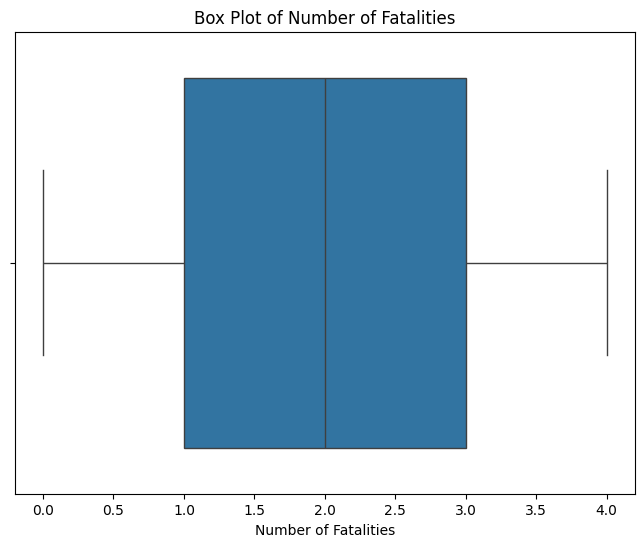

In [70]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Number of Fatalities'])
plt.title('Box Plot of Number of Fatalities')
plt.show()

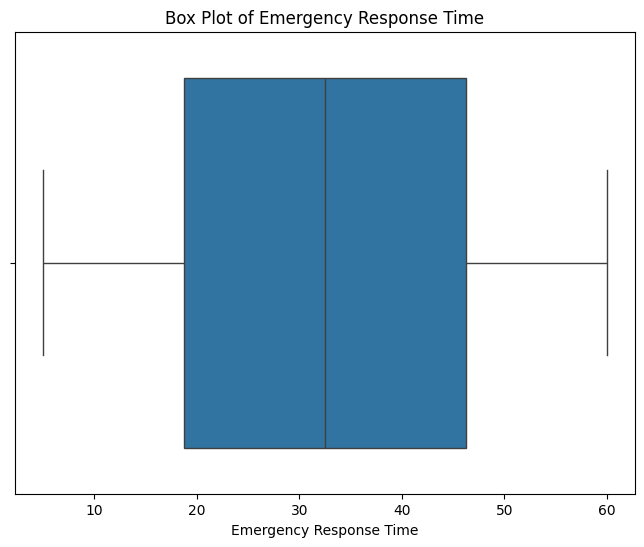

In [71]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Emergency Response Time'])
plt.title('Box Plot of Emergency Response Time')
plt.show()

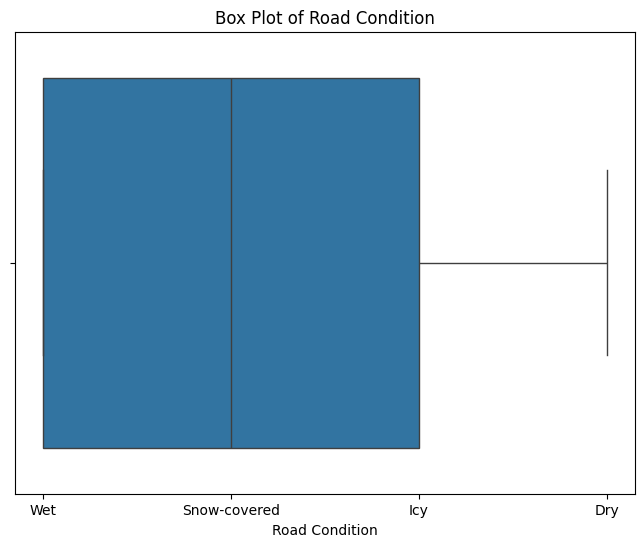

In [72]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Road Condition'])
plt.title('Box Plot of Road Condition')
plt.show()

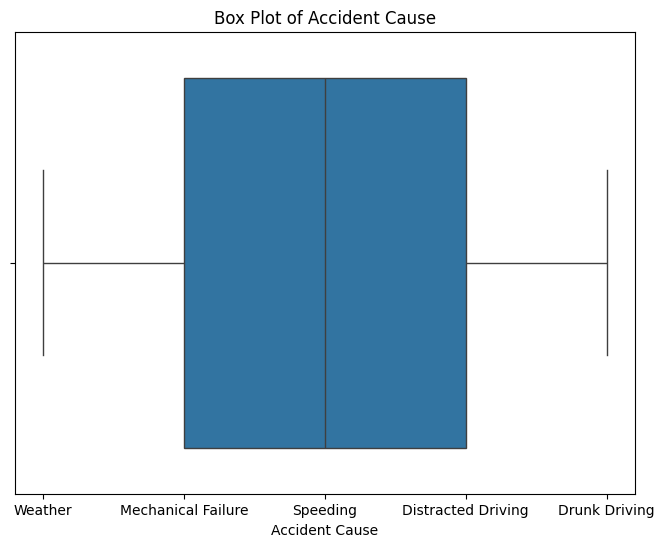

In [73]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Accident Cause'])
plt.title('Box Plot of Accident Cause')
plt.show()

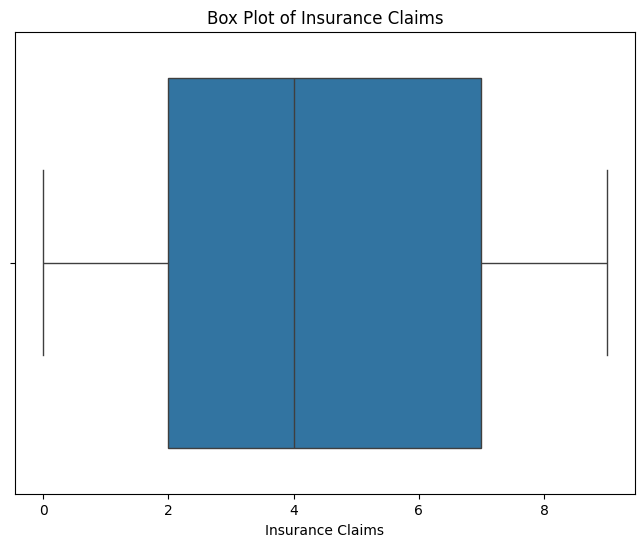

In [74]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Insurance Claims'])
plt.title('Box Plot of Insurance Claims')
plt.show()

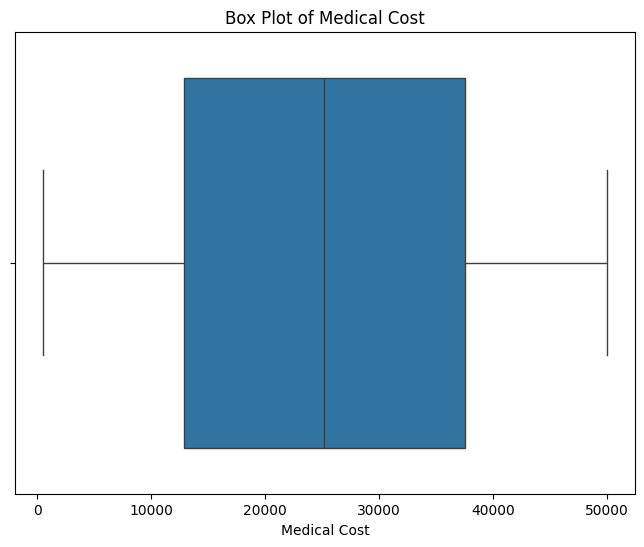

In [75]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Medical Cost'])
plt.title('Box Plot of Medical Cost')
plt.show()

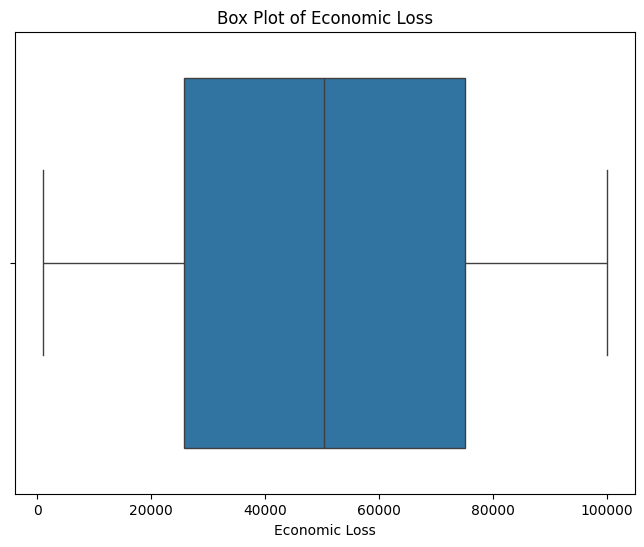

In [76]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Economic Loss'])
plt.title('Box Plot of Economic Loss')
plt.show()

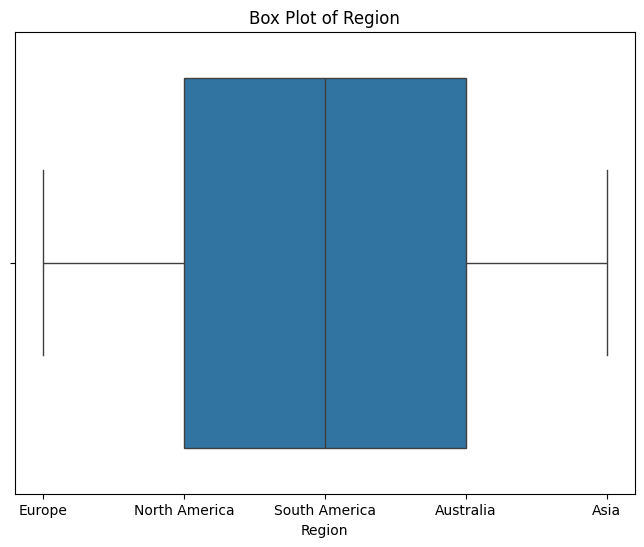

In [77]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Region'])
plt.title('Box Plot of Region')
plt.show()

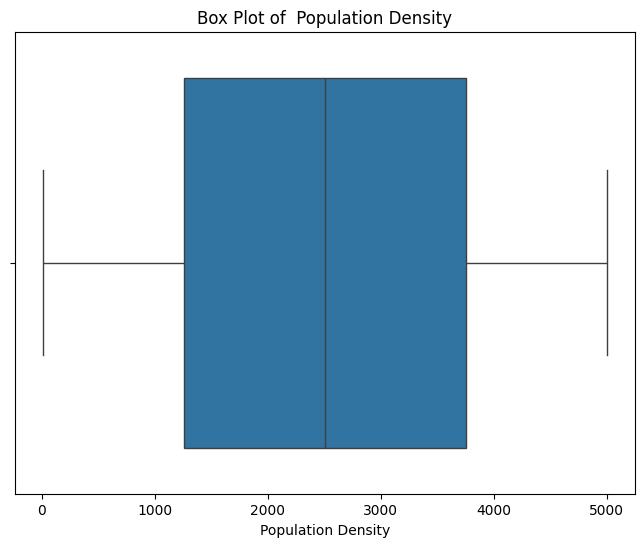

In [78]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Population Density'])
plt.title('Box Plot of  Population Density')
plt.show()

# **Mean,Standard Deviation,Variance,Skewness,Kurt**

In [79]:
mean_visibility = np.mean(data['Visibility Level'])
std_visibility = np.std(data['Visibility Level'])
variance_visibility = np.var(data['Visibility Level'])
skew_visibility = skew(data['Visibility Level'])
kurt_visibility = kurtosis(data['Visibility Level'])

print(f"Mean Visibility Level: {mean_visibility}")
print(f"Standard Deviation of Visibility Level: {std_visibility}")
print(f"Variance of Visibility Level: {variance_visibility}")
print(f"Skewness of Visibility Level: {skew_visibility}")
print(f"Kurtosis of Visibility Level: {kurt_visibility}")

Mean Visibility Level: 275.03877575822486
Standard Deviation of Visibility Level: 129.92313242501666
Variance of Visibility Level: 16880.020339128416
Skewness of Visibility Level: 0.002267422233877595
Kurtosis of Visibility Level: -1.2028951090689577


In [80]:
import pandas as pd
import numpy as np
for col in data.columns:
  if pd.api.types.is_numeric_dtype(data[col]):
    mean_val = np.mean(data[col])
    std_val = np.std(data[col])
    var_val = np.var(data[col])
    skew_val = skew(data[col])
    kurt_val = kurtosis(data[col])

    print(f"Column: {col}")
    print(f"Mean: {mean_val}")
    print(f"Standard Deviation: {std_val}")
    print(f"Variance: {var_val}")
    print(f"Skewness: {skew_val}")
    print(f"Kurtosis: {kurt_val}")
    print("-" * 20)


Column: Year
Mean: 2011.9733484848484
Standard Deviation: 7.198596369894301
Variance: 51.819789696655405
Skewness: 0.0011328725021750516
Kurtosis: -1.2005542050679359
--------------------
Column: Visibility Level
Mean: 275.03877575822486
Standard Deviation: 129.92313242501666
Variance: 16880.020339128416
Skewness: 0.002267422233877595
Kurtosis: -1.2028951090689577
--------------------
Column: Number of Vehicles Involved
Mean: 2.501227272727273
Standard Deviation: 1.1172673684439858
Variance: 1.2482863725897488
Skewness: -0.0027331737341915047
Kurtosis: -1.3582363290853758
--------------------
Column: Speed Limit
Mean: 74.54406818181818
Standard Deviation: 26.00134927375801
Variance: 676.0701640559562
Skewness: -0.0007512280544148463
Kurtosis: -1.201371862370332
--------------------
Column: Driver Alcohol Level
Mean: 0.12523188046021863
Standard Deviation: 0.07222451625994755
Variance: 0.005216380748983428
Skewness: -0.0023659852900620435
Kurtosis: -1.2021025007962456
------------------

In [85]:
data

,Country,Year,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Visibility Level,Number of Vehicles Involved,...,Number of Fatalities,Emergency Response Time,Traffic Volume,Road Condition,Accident Cause,Insurance Claims,Medical Cost,Economic Loss,Region,Population Density
0,USA,2002,October,Tuesday,Evening,Rural,Street,Windy,220.414651,1,...,2,58.625720,7412.752760,Wet,Weather,4,40499.856982,22072.878502,Europe,3866.273014
1,UK,2014,December,Saturday,Evening,Urban,Street,Windy,168.311358,3,...,1,58.041380,4458.628820,Snow-covered,Mechanical Failure,3,6486.600073,9534.399441,North America,2333.916224
2,USA,2012,July,Sunday,Afternoon,Urban,Highway,Snowy,341.286506,4,...,4,42.374452,9856.915064,Wet,Speeding,4,29164.412982,58009.145124,South America,4408.889129
3,UK,2017,May,Saturday,Evening,Urban,Main Road,Clear,489.384536,2,...,3,48.554014,4958.646267,Icy,Distracted Driving,3,25797.212566,20907.151302,Australia,2810.822423
4,Canada,2002,July,Tuesday,Afternoon,Rural,Highway,Rainy,348.344850,1,...,4,18.318250,3843.191463,Icy,Distracted Driving,8,15605.293921,13584.060759,South America,3883.645634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131995,Germany,2023,June,Wednesday,Evening,Rural,Main Road,Foggy,351.740871,4,...,0,37.405598,1907.208566,Icy,Speeding,3,18640.125887,50695.311876,Asia,173.307333
131996,Brazil,2023,January,Tuesday,Morning,Rural,Main Road,Foggy,95.563567,1,...,4,17.054490,2706.253339,Dry,Drunk Driving,2,48161.129965,20260.167191,Asia,4375.443810
131997,Russia,2021,March,Wednesday,Afternoon,Urban,Street,Clear,74.112102,3,...,3,55.558876,6860.161645,Dry,Speeding,9,24696.058692,8132.133502,Asia,4196.244517
131998,Australia,2002,May,Tuesday,Morning,Urban,Street,Rainy,276.612565,3,...,2,19.100498,1523.299088,Wet,Speeding,8,13486.716680,17607.573072,Europe,2911.904030


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132000 entries, 0 to 131999
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Country                      132000 non-null  category
 1   Year                         132000 non-null  int64   
 2   Month                        132000 non-null  category
 3   Day of Week                  132000 non-null  category
 4   Time of Day                  132000 non-null  category
 5   Urban/Rural                  132000 non-null  category
 6   Road Type                    132000 non-null  category
 7   Weather Conditions           132000 non-null  category
 8   Visibility Level             132000 non-null  float64 
 9   Number of Vehicles Involved  132000 non-null  int64   
 10  Speed Limit                  132000 non-null  int64   
 11  Driver Age Group             132000 non-null  category
 12  Driver Gender                132000 non-null

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = data['Number of Vehicles Involved']
y = data['Insurance Claims']

# Convert categorical features to numerical using one-hot encoding if necessary
X = pd.get_dummies(X, drop_first=True)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logreg = LogisticRegression(solver='liblinear', max_iter=1000)
logreg.fit(X_train, y_train)


# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.10238636363636364
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2661
           1       0.00      0.00      0.00      2616
           2       0.00      0.00      0.00      2634
           3       0.00      0.00      0.00      2678
           4       0.10      0.52      0.17      2637
           5       0.00      0.00      0.00      2661
           6       0.10      0.25      0.15      2650
           7       0.10      0.25      0.15      2640
           8       0.00      0.00      0.00      2580
           9       0.00      0.00      0.00      2643

    accuracy                           0.10     26400
   macro avg       0.03      0.10      0.05     26400
weighted avg       0.03      0.10      0.05     26400

[[   0    0    0    0 1268    0  700  693    0    0]
 [   0    0    0    0 1320    0  665  631    0    0]
 [   0    0    0    0 1357    0  640  637    0    0]
 [   0    0    0    0 1386    0  640  652    0    0]

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
